## <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Problem Statement</span>

### <span style=" font-family:'abadi';font-style:italic;">The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default</span>

* <span style=" font-family:'abadi';font-style:italic;">Analyse the Lending applicants data of Lending Club from 2007 to 2011</span>
* <span style=" font-family:'abadi';font-style:italic;">Minimise the risk of losing money while lending to urban customers</span>
* <span style=" font-family:'abadi';font-style:italic;">Avoid Financial loss by not lending to applicants likely to default</span>
* <span style=" font-family:'abadi';font-style:italic;">Identify the Patterns for applicants likely to default</span>

## <span style="color:blue; font-weight : bold; font-family:abadi">Main Objective </span>

* <span style=" font-family:'abadi';font-style:italic;">Avoid Business loss by lending to applicants who likely to repay the loan</span>
* <span style=" font-family:'abadi';font-style:italic;">Avoid Financial Loss by rejecting applicants who are likely to default</span>

In [2]:
#Importing the necessary libraries used
#Panda for Data Wrangling and Data manipulation purposes
#NumPy objects to create arrays/metrics to apply DL/ML models
#Matplotlib to create a range of plots and visualization
#Seaborn to create visually appealing statistical graphics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the dataset
loan = pd.read_csv('loan.csv')

In [4]:
#Setting display option
pd.set_option("display.max_columns",300)
pd.set_option('display.max_rows',300)

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';"> Understanding the Data, data types, No.Of Entries</span>

In [6]:
#Checking the shape of the dataframe
loan.shape

(39717, 111)

In [7]:
#Viewing the dataframe
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [8]:
#Understanding the information about loan
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
#Understanding the statistical information of dataframe
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Identifying the Data Quality Issues and rectifying them</span>

### <span style="font-weight : bold; font-family:'Times New Roman';">1. Identifying the Null Values in columns</span>

In [11]:
#Finding the no of null values in each column
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### <span style="font-weight : bold; font-family:'Times New Roman';">Identifying the Null Value percentages for each column</span>
#### <span style=" font-family:'abadi';font-style:italic;">Finding the percentages to check if any columns have very high percentage of null values</span>

In [13]:
cols_null_percentage = round((loan.isnull().sum()/loan.shape[0])*100,2)
cols_null_percentage

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.59
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can observe that there are columns with no data at all.</span>
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Lets find out how many columns have no data at all. Also, its safe to assume that if a column doesn't have more than 60% of data, it can be dropped as it would not add much value to our analysis, rather mislead it.</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Dropping the above columns (With more than 60% Null Data)</span>

In [15]:
cols_null_percentage_list = (cols_null_percentage[cols_null_percentage > 60]).index.tolist()

In [16]:
#Dropping all the cols with null percentage>60
loan = loan.drop(cols_null_percentage_list, axis = 1)

In [17]:
loan.shape

(39717, 54)

### <span style="font-weight : bold; font-family:'Times New Roman';">2. Identifying the Null Value percentages for each rows</span>
#### <span style=" font-family:'abadi';font-style:italic;">Finding the percentages to check if any rows have very high percentage of null values</span>

In [18]:
rows_null_percentage = round((loan.isnull().sum(axis=1)/loan.shape[1])*100,2)
rows_null_percentage.max()

np.float64(11.11)

In [19]:
rows_null_percentage[rows_null_percentage>10]

39714    11.11
39715    11.11
dtype: float64

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">As the missing value percentages is nearly just 10% or below for most of the rows. We will not be dropping any rows</span>

### <span style="font-weight : bold; font-family:'Times New Roman';">3. Identifying if there are any duplicate records</span>

In [20]:
loan[loan.duplicated()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">There are no duplicate records</span>

### <span style="font-weight : bold; font-family:'Times New Roman';">4. Removing few columns which have single values as they wont contribute to our analysis</span>

In [21]:
unique_cols = loan.columns[loan.nunique() == 1].tolist()
unique_cols

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [22]:
#unique_cols - contains list of the columns which have just 1 value
loan.drop(unique_cols, axis=1, inplace = True)

In [23]:
#checking again to see if any cols still have single unique value
loan.columns[loan.nunique() == 1]

Index([], dtype='object')

In [24]:
#shape of the df loan after dropping - unique_cols
loan.shape

(39717, 45)

### <span style="font-weight : bold; font-family:'Times New Roman';">5. Removing few columns which do not add any value to our Analysis</span>

* #### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">id, member_id - These are just IDs given to each individual,not relevant and are unique and no information to be derived from these</span>
* #### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Redundant columns - loan_amnt,funded_amnt_inv, url, desc, title</span>
* #### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Descriptive column about employee and not useful for analysis - emp_title</span>
* #### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Columns describing customer attributes after loan is approved - delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, pub_rec_bankruptcies </span>
* #### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">Complete info not provided - zip_code </span>

In [25]:
loan.drop(['id','member_id','loan_amnt','installment','funded_amnt_inv', 'url', 'desc', 'title','emp_title','delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies','zip_code' ], axis = 1, inplace = True)

In [26]:
#shape of the dataframe loan after dropping all the unnecessary columns which in no way contribute to the analysis
loan.shape

(39717, 14)

In [27]:
#understanding the data, after removing unwanted columns
loan.head()

funded_amnt        term int_rate grade sub_grade emp_length home_ownership  \
0         5000   36 months   10.65%     B        B2  10+ years           RENT   
1         2500   60 months   15.27%     C        C4   < 1 year           RENT   
2         2400   36 months   15.96%     C        C5  10+ years           RENT   
3        10000   36 months   13.49%     C        C1  10+ years           RENT   
4         3000   60 months   12.69%     B        B5     1 year           RENT   

   annual_inc verification_status issue_d  loan_status         purpose  \
0     24000.0            Verified  Dec-11   Fully Paid     credit_card   
1     30000.0     Source Verified  Dec-11  Charged Off             car   
2     12252.0        Not Verified  Dec-11   Fully Paid  small_business   
3     49200.0     Source Verified  Dec-11   Fully Paid           other   
4     80000.0     Source Verified  Dec-11      Current           other   

  addr_state    dti  
0         AZ  27.65  
1         GA   1.00  
2         IL   8.72  
3         CA  20.00  
4         OR  17.94

### <span style="font-weight : bold; font-family:'Times New Roman';">6. Removing records which do not contribute to our analysis</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight:bold;">There are few records which hold details about the current loan applicants. We cannot infer anything from these applicants as they have neither paid the loan completely nor defaulted</span>

In [28]:
#check the number of rows with status as current
loan[loan['loan_status']=='Current']

funded_amnt        term int_rate grade sub_grade emp_length  \
4             3000   60 months   12.69%     B        B5     1 year   
32           10000   60 months   15.96%     C        C5    2 years   
39           12500   60 months   12.69%     B        B5     1 year   
86           14000   60 months   17.27%     D        D3    4 years   
95           15300   60 months   22.06%     F        F4    6 years   
...            ...         ...      ...   ...       ...        ...   
15972        10400   60 months    6.00%     E        E3    5 years   
15981         6000   60 months   10.37%     B        B3     1 year   
16361        19200   60 months   10.74%     B        B4    5 years   
16609         9350   60 months   10.00%     B        B2    8 years   
18215         9000   60 months   13.06%     C        C2    4 years   

      home_ownership  annual_inc verification_status issue_d loan_status  \
4               RENT     80000.0     Source Verified  Dec-11     Current   
32              RENT     29120.0            Verified  Dec-11     Current   
39              RENT     27000.0            Verified  Dec-11     Current   
86              RENT     28000.0            Verified  Dec-11     Current   
95              RENT     85000.0            Verified  Dec-11     Current   
...              ...         ...                 ...     ...         ...   
15972       MORTGAGE     29000.0     Source Verified  May-11     Current   
15981           RENT     24000.0     Source Verified  Apr-11     Current   
16361       MORTGAGE    100000.0            Verified  Apr-11     Current   
16609           RENT     66000.0        Not Verified  Apr-11     Current   
18215           RENT     44137.0        Not Verified  Mar-11     Current   

                  purpose addr_state    dti  
4                   other         OR  17.94  
32     debt_consolidation         FL  22.83  
39     debt_consolidation         IL  16.04  
86                  other         WA   6.34  
95            credit_card         VA  20.58  
...                   ...        ...    ...  
15972         credit_card         TX  10.84  
15981                 car         NY  11.05  
16361      small_business         NJ   4.43  
16609                 car         NY   4.84  
18215  debt_consolidation         CA   5.74  

[1140 rows x 14 columns]

In [29]:
#removing these rows
loan = loan[~(loan['loan_status']=='Current')]

In [30]:
#verifying the shape of dataframe loan
loan.shape

(38577, 14)

### <span style="font-weight : bold; font-family:'Times New Roman';">7. Convert the datatypes of the columns </span>

In [31]:
#Check the datatypes of the columns and change accordingly
loan.dtypes

funded_amnt              int64
term                    object
int_rate                object
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

In [32]:
#Changing the column int_rate to int type from object type
loan['int_rate'] = loan['int_rate'].apply(lambda x: x[:-1])
loan['int_rate'] = loan['int_rate'].astype('float32')

In [33]:
loan['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float32

In [34]:
#Recheck the datatype
loan.dtypes

funded_amnt              int64
term                    object
int_rate               float32
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

### <span style="font-weight : bold; font-family:'Times New Roman';">8. Add Derived columns to facilitate analysis</span>

In [35]:
loan['issue_d']=pd.to_datetime(loan['issue_d'], format='%b-%y')
#Deriving month and year columns from issue_d
loan['issue_mon']=pd.DatetimeIndex(loan['issue_d']).month
loan['issue_yrs']=pd.DatetimeIndex(loan['issue_d']).year
#To prevent data misleading, as day of the month will only be 1
loan['issue_d'] = pd.to_datetime(loan['issue_d']).dt.strftime('%Y-%m')

In [37]:
loan.shape
loan

funded_amnt        term  int_rate grade sub_grade emp_length  \
0             5000   36 months     10.65     B        B2  10+ years   
1             2500   60 months     15.27     C        C4   < 1 year   
2             2400   36 months     15.96     C        C5  10+ years   
3            10000   36 months     13.49     C        C1  10+ years   
5             5000   36 months      7.90     A        A4    3 years   
...            ...         ...       ...   ...       ...        ...   
39712         2500   36 months      8.07     A        A4    4 years   
39713         8500   36 months     10.28     C        C1    3 years   
39714         5000   36 months      8.07     A        A4   < 1 year   
39715         5000   36 months      7.43     A        A2   < 1 year   
39716         7500   36 months     13.75     E        E2   < 1 year   

      home_ownership  annual_inc verification_status  issue_d  loan_status  \
0               RENT     24000.0            Verified  2011-12   Fully Paid   
1               RENT     30000.0     Source Verified  2011-12  Charged Off   
2               RENT     12252.0        Not Verified  2011-12   Fully Paid   
3               RENT     49200.0     Source Verified  2011-12   Fully Paid   
5               RENT     36000.0     Source Verified  2011-12   Fully Paid   
...              ...         ...                 ...      ...          ...   
39712       MORTGAGE    110000.0        Not Verified  2007-07   Fully Paid   
39713           RENT     18000.0        Not Verified  2007-07   Fully Paid   
39714       MORTGAGE    100000.0        Not Verified  2007-07   Fully Paid   
39715       MORTGAGE    200000.0        Not Verified  2007-07   Fully Paid   
39716            OWN     22000.0        Not Verified  2007-06   Fully Paid   

                  purpose addr_state    dti  issue_mon  issue_yrs  
0             credit_card         AZ  27.65         12       2011  
1                     car         GA   1.00         12       2011  
2          small_business         IL   8.72         12       2011  
3                   other         CA  20.00         12       2011  
5                 wedding         AZ  11.20         12       2011  
...                   ...        ...    ...        ...        ...  
39712    home_improvement         CO  11.33          7       2007  
39713         credit_card         NC   6.40          7       2007  
39714  debt_consolidation         MA   2.30          7       2007  
39715               other         MD   3.72          7       2007  
39716  debt_consolidation         MA  14.29          6       2007  

[38577 rows x 16 columns]

### <span style="font-weight : bold; font-family:'Times New Roman';">8. Creating Derived Columns which will help in our analysis </span>

In [54]:
#Adding derived column annual_inc_bracket, which creates buckets for annual_income to facilitate analysis
def annual_inc_bracket(column):
    if column <=30000:
        return '4K - 30K'
    elif (column >30000) and (column <=40000):
        return '30K - 40K'
    elif (column >40000) and (column <=50000):
        return '40K - 50K'
    elif (column >50000) and (column <=60000):
        return '50K - 60K'
    elif (column >60000) and (column <=70000):
        return '60K - 70K'
    elif (column >70000) and (column <=80000):
        return '70K - 80K'
    elif (column >80000) and (column <=100000):
        return '80K - 100K'
    elif (column >100000) and (column <=200000):
        return '100K - 200K'
    else:
        return '200K+'
loan['annual_inc_bracket']=loan.apply(lambda x:annual_inc_bracket(x['annual_inc']),axis=1)

In [63]:
#Adding derived column annual_inc_bracket, which creates buckets for annual_income to facilitate analysis
def dti_bracket(column):
    if column <=5:
        return '0-5'
    elif (column >5) and (column <=10):
        return '5-10'
    elif (column >10) and (column <=15):
        return '10-15'
    elif (column >15) and (column <=20):
        return '15-20'
    elif (column >20) and (column <=25):
        return '20-25'
    else:
        return '25-30'
loan['dti_bracket']=loan.apply(lambda x:dti_bracket(x['dti']),axis=1)

In [119]:
def funded_amnt_bracket(column):
    if column <=5000:
        return '0-5K'
    elif (column >5000) and (column <=10000):
        return '5K-10K'
    elif (column >10000) and (column <=15000):
        return '10K-15K'
    elif (column >15000) and (column <=20000):
        return '15K-20K'
    elif (column >20000) and (column <=25000):
        return '20K-25K'
    elif (column >25000) and (column <=30000):
        return '25K-30K'  
    else:
        return '30K-35K'
loan['funded_amnt_bracket']=loan.apply(lambda x:funded_amnt_bracket(x['funded_amnt']),axis=1)

In [120]:
def int_rate_bracket(column):
    if column <=10:
        return '5-10%'
    elif (column >10) and (column <=15):
        return '10-15%'
    elif (column >15) and (column <=20):
        return '15-20%'  
    else:
        return '20-25%'
loan['int_rate_bracket']=loan.apply(lambda x:int_rate_bracket(x['int_rate']),axis=1)

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Identifying Missing values in records</span>

In [38]:
#Check if any values are missing for any records
loan.isnull().sum()

funded_amnt               0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
issue_mon                 0
issue_yrs                 0
dtype: int64

In [39]:
#We see that 1033 records are missing employee length
loan['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [40]:
#Removing the records with null values for emp_length, to prevent assuming and  skewing the chart more towards the 10+ years 
#without having enough correct information
loan = loan.dropna(subset=['emp_length'])

In [41]:
#Final check for nulls, data shape, data type of all columns used
loan.isnull().sum()

funded_amnt            0
term                   0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
issue_mon              0
issue_yrs              0
dtype: int64

In [42]:
loan.shape

(37544, 16)

In [43]:
loan.dtypes

funded_amnt              int64
term                    object
int_rate               float32
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
issue_mon                int32
issue_yrs                int32
dtype: object

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Check Data Consistency</span>

In [44]:
#Check all columns to see all are in the range expected and dont have unexpected values.
loan['funded_amnt'].value_counts()
loan['funded_amnt'].describe()

count    37544.000000
mean     10853.560489
std       7096.316776
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [45]:
loan['term'].value_counts()
loan['term'].describe()

count          37544
unique             2
top        36 months
freq           28287
Name: term, dtype: object

In [46]:
loan['int_rate'].value_counts()
loan['int_rate'].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [47]:
loan['grade'].value_counts()

grade
B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: count, dtype: int64

In [48]:
loan['sub_grade'].value_counts()

sub_grade
A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

In [49]:
loan['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [50]:
loan['home_ownership'].value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: count, dtype: int64

In [51]:
#We can safely assume that the home_ownership of the 3 records having null to be rent, because its the most repeating value(mode).
#Also this assumption will not hinder our analysis
loan['home_ownership'] = loan['home_ownership'].apply(lambda x:'RENT' if x == 'NONE' else x)

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Missing Value NONE treated, replaced as RENT</span>

In [52]:
loan['home_ownership'].value_counts()

home_ownership
RENT        18081
MORTGAGE    16595
OWN          2770
OTHER          98
Name: count, dtype: int64

In [55]:
loan['annual_inc_bracket'].value_counts()

annual_inc_bracket
40K - 50K      5539
50K - 60K      5462
30K - 40K      4956
100K - 200K    4871
80K - 100K     4466
4K - 30K       4183
60K - 70K      4026
70K - 80K      3479
200K+           562
Name: count, dtype: int64

In [56]:
loan['verification_status'].value_counts()

verification_status
Not Verified       16278
Verified           11772
Source Verified     9494
Name: count, dtype: int64

In [57]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64

In [58]:
loan['purpose'].value_counts()

purpose
debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

In [59]:
loan['addr_state'].value_counts()

addr_state
CA    6768
NY    3599
FL    2694
TX    2605
NJ    1768
IL    1442
PA    1437
VA    1340
GA    1319
MA    1268
OH    1146
MD    1005
AZ     806
WA     783
CO     744
NC     726
CT     707
MI     671
MO     647
MN     583
NV     464
SC     451
WI     426
OR     421
AL     418
LA     417
KY     307
OK     282
UT     247
KS     244
AR     227
DC     211
RI     192
NM     179
WV     164
HI     162
NH     157
DE     110
MT      77
WY      76
AK      76
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [60]:
loan['dti'].value_counts()

dti
0.00     168
18.00     44
12.00     44
19.20     39
13.20     38
        ... 
28.42      1
28.74      1
29.78      1
25.21      1
26.29      1
Name: count, Length: 2848, dtype: int64

In [61]:
loan['issue_mon'].value_counts()

issue_mon
12    4120
11    3890
10    3637
9     3394
8     3321
7     3253
6     3094
5     2838
4     2756
3     2632
1     2331
2     2278
Name: count, dtype: int64

In [62]:
loan['issue_yrs'].value_counts()

issue_yrs
2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

### <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Outlier Treatment</span>

Text(0.5, 0, 'Funded Amount')

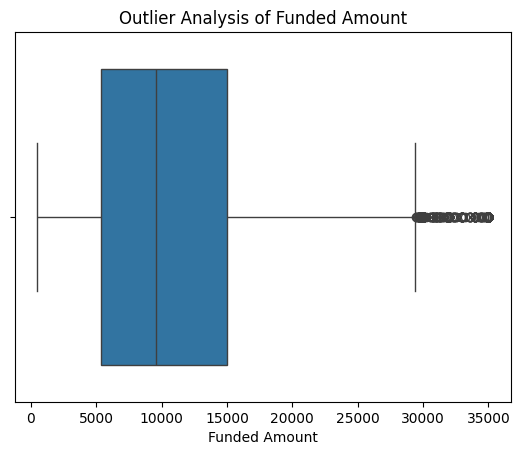

In [65]:
#Using box plots for continuous data to check for outliers in funded amount
sns.boxplot(x=loan['funded_amnt'])
plt.title('Outlier Analysis of Funded Amount')
plt.xlabel('Funded Amount')

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can observe that the funded amount outliers are also pretty continuous and hence we can continue our analysis without removing them</span>

Text(0.5, 0, 'Interest Rate')

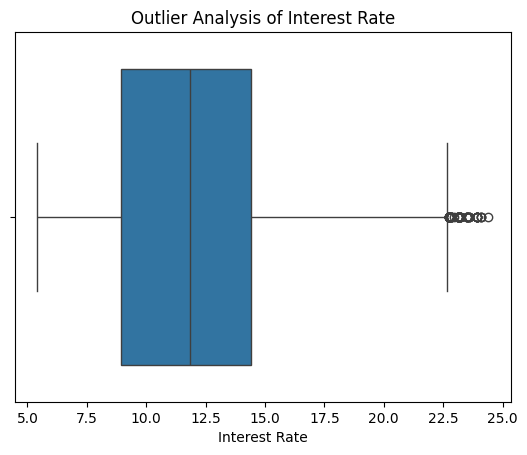

In [66]:
#Using box plots for continuous data to check for outliers in interest rate
sns.boxplot(x=loan['int_rate'])
plt.title('Outlier Analysis of Interest Rate')
plt.xlabel('Interest Rate')

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can observe that the Interest Rate outliers are also pretty continuous and hence we can continue our analysis without removing them</span>

Text(0.5, 0, 'Annual Income')

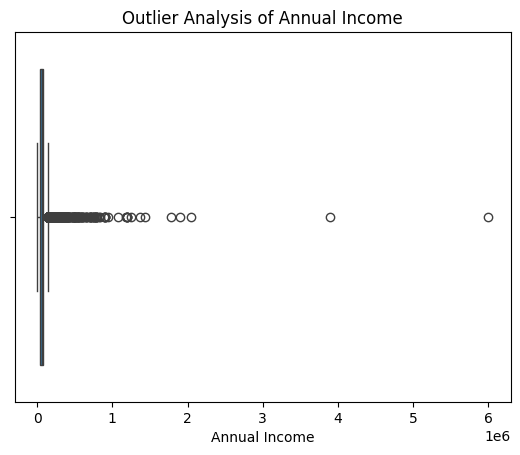

In [67]:
#Using box plots for continuous data to check for outliers in annual income
sns.boxplot(x=loan['annual_inc'])
plt.title('Outlier Analysis of Annual Income')
plt.xlabel('Annual Income')

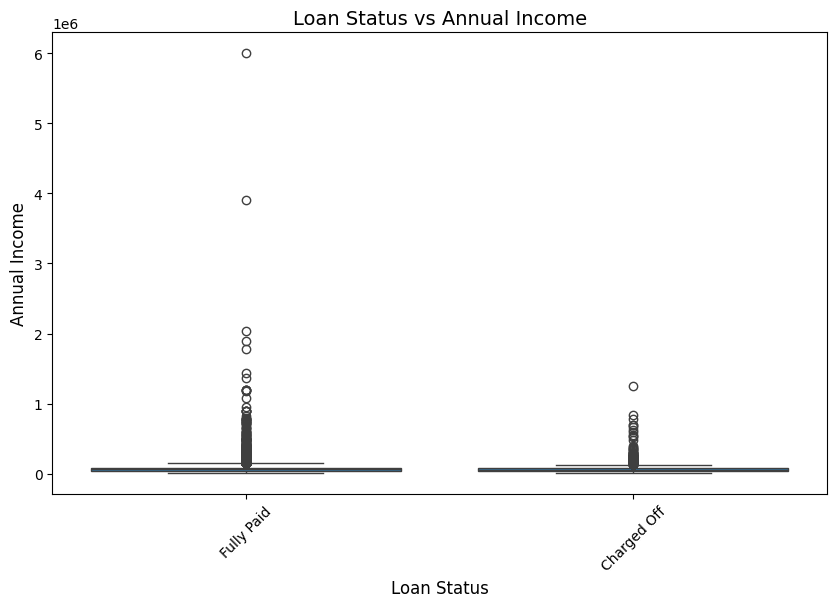

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan, x='loan_status', y='annual_inc')
plt.title("Loan Status vs Annual Income", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can consider any value of annual income above 150000 as an outlier because we dont have any defaulters with income>150000</span>

In [72]:
#Removing the outliers
loan=loan[loan['annual_inc']<=150000]

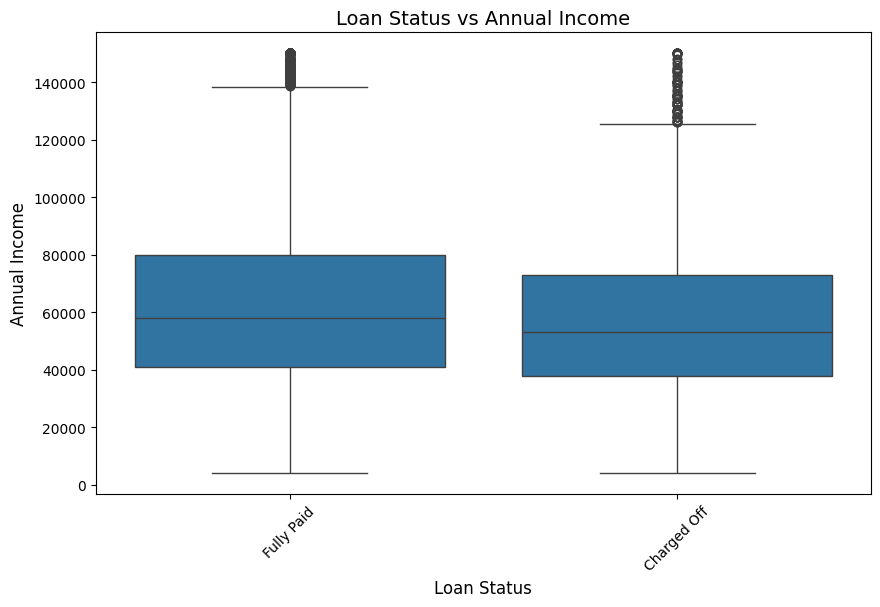

In [74]:
#Box plot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan, x='loan_status', y='annual_inc')
plt.title("Loan Status vs Annual Income", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Debt_to_Income Ratio')

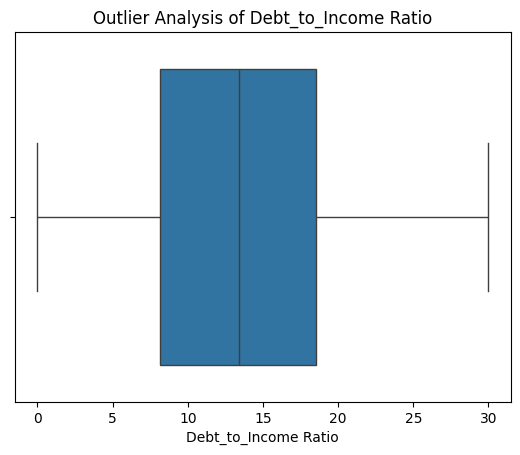

In [70]:
#Using box plots for continuous data to check for outliers in annual income
sns.boxplot(x=loan['dti'])
plt.title('Outlier Analysis of Debt_to_Income Ratio')
plt.xlabel('Debt_to_Income Ratio')

## <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Univariate Analysis and Segmented Univariate Analysis</span>

* <span style="color:Turquoise; font-weight : bold; font-family:'Times New Roman'; font-size:20px">Categorical Variables</span>
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Ordered Categorical</span>
        1.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Term</span>
        2.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Grade</span>
        3.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Sub Grade</span>
        4.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Employee length</span>
        5.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Issue Months</span>
        6.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Issue Years</span>
    2. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Unordered Categorical</span>
        1.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Home Ownership</span>
        1.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Verification Status</span>
        1.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Loan Status</span>
        1.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Purpose</span>
        1.  <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Address State</span>
* <span style="color:Turquoise; font-weight : bold; font-family:'Times New Roman'; font-size:20px">Quantitative Variables</span>
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Funded Amount</span>
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Interest Rate</span>
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Debt-to-Interest Bracket</span>
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Annual Income Bracket</span>

Text(0, 0.5, 'Frequency')

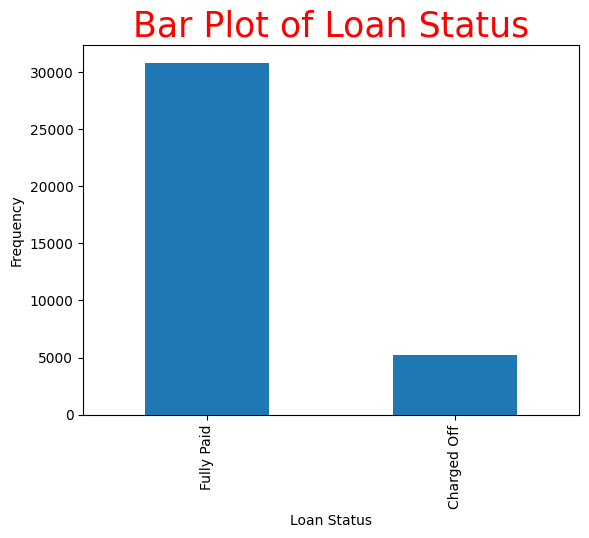

In [76]:
#univariate analysis of Loan Status
loan['loan_status'].value_counts().plot.bar()
plt.title('Bar Plot of Loan Status', color='red', size=25)
plt.xlabel('Loan Status') 
plt.ylabel('Frequency')

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">From above graph we can derive that 85.47% - full repaid the loan and 14.53% - Charged-off</span>

In [78]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     30835
Charged Off     5239
Name: count, dtype: int64

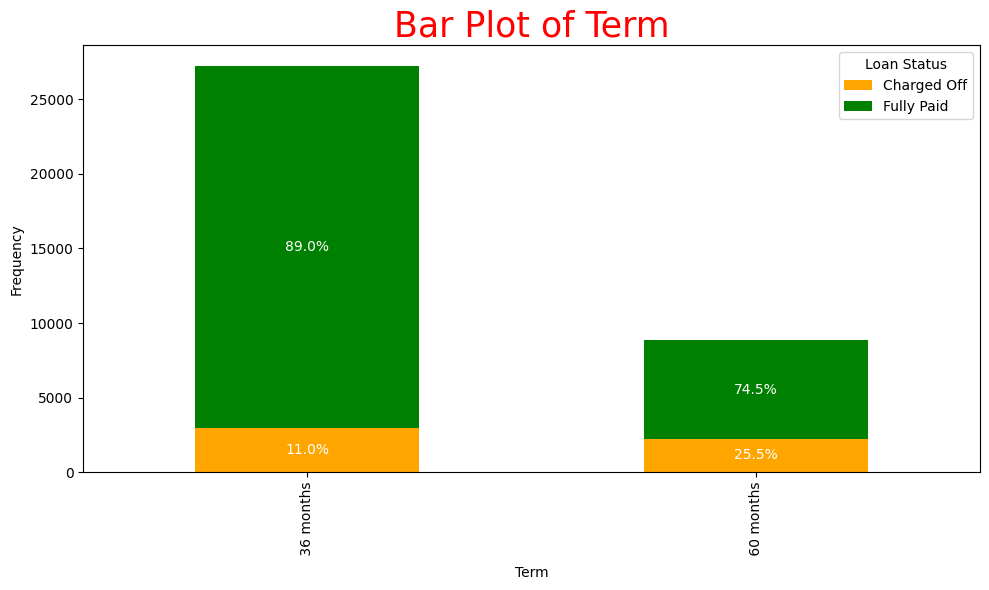

In [79]:
#univariate analysis of term
grouped = loan.groupby(['term', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Term', color='red', size=25)
plt.xlabel('Term') 
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, term in enumerate(grouped.index):
    total = grouped.loc[term].sum()  # Total for this term
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[term, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  

plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. 89% of applicants with term-36months fully repay the loan, whereas only 74.5% of applicants with term-60 months fully repay the loan
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Our Recommendations:
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Lend Money to applicants at short terms, here:36 months to avoid financial loss </span>

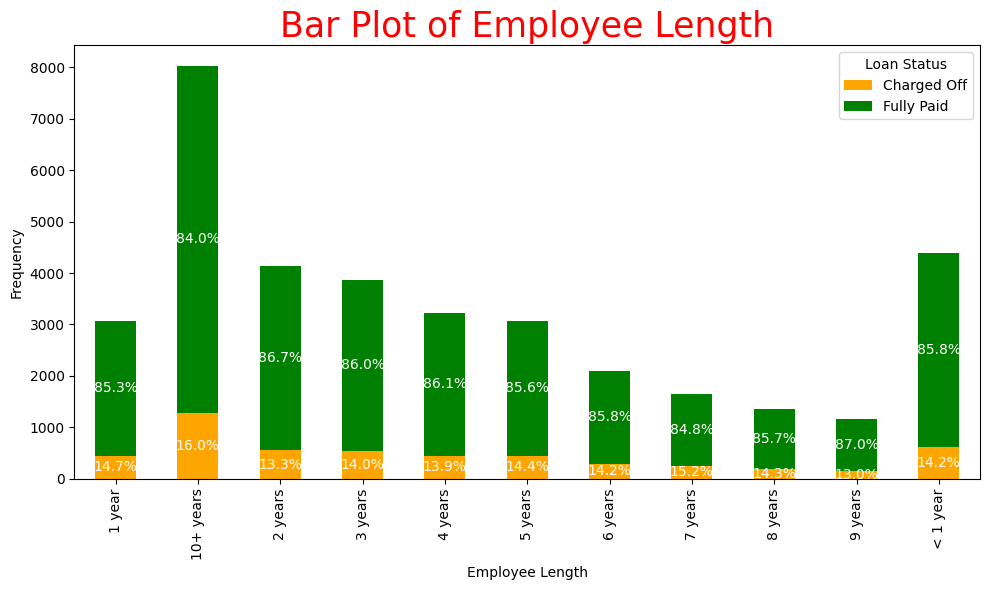

In [82]:
#univariate analysis of emp_length
grouped = loan.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Employee Length', color='red', size=25)
plt.xlabel('Employee Length')
plt.ylabel('Frequency')
#univariate analysis of 

# Add percentage annotations on each stack
for i, emp_length in enumerate(grouped.index):
    total = grouped.loc[emp_length].sum()  # Total for this emp_length
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[emp_length, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Approximately 15% of the applicants charge off irrespective of employee length. 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Our Recommendations:
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">It is safe to assume that Employee length does not impact the loan repayment.</span>

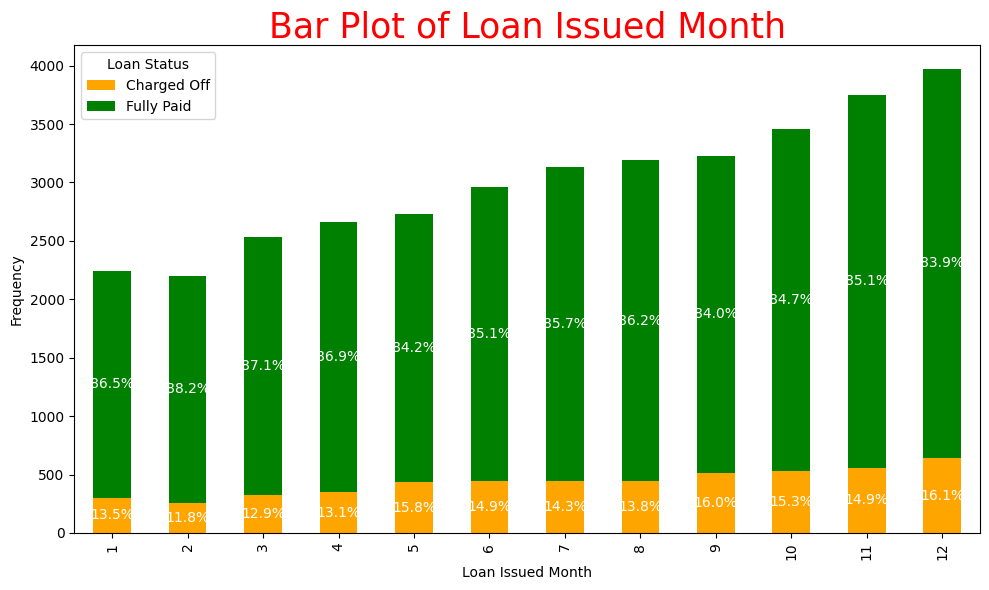

In [84]:
grouped = loan.groupby(['issue_mon', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Loan Issued Month', color='red', size=25)
plt.xlabel('Loan Issued Month')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, issue_mon in enumerate(grouped.index):
    total = grouped.loc[issue_mon].sum()  # Total for this issue_mon
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[issue_mon, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Number of applicants who charge-off is less in the months January-April.
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Our Recommendations:
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">It is derived that applicants taking loan in November or December default the highest. The reason for this could be Holiday(Black Friday, Christmas) season. It is recommended to lend money in the initial month's of the years (January-April)</span>

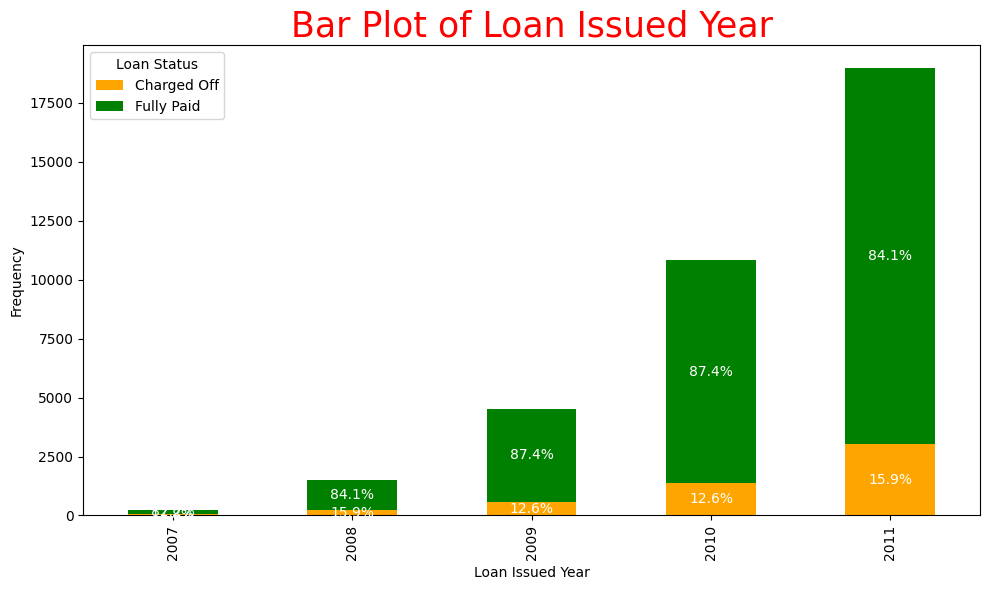

In [85]:
grouped = loan.groupby(['issue_yrs', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Loan Issued Year', color='red', size=25)
plt.xlabel('Loan Issued Year')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, issue_yrs in enumerate(grouped.index):
    total = grouped.loc[issue_yrs].sum()  # Total for this issue_yrs
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[issue_yrs, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Approximately every year 15% of the applicants charge-off
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Our Recommendations:
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">It is safe to assume that Employee length does not impact the loan repayment.</span>

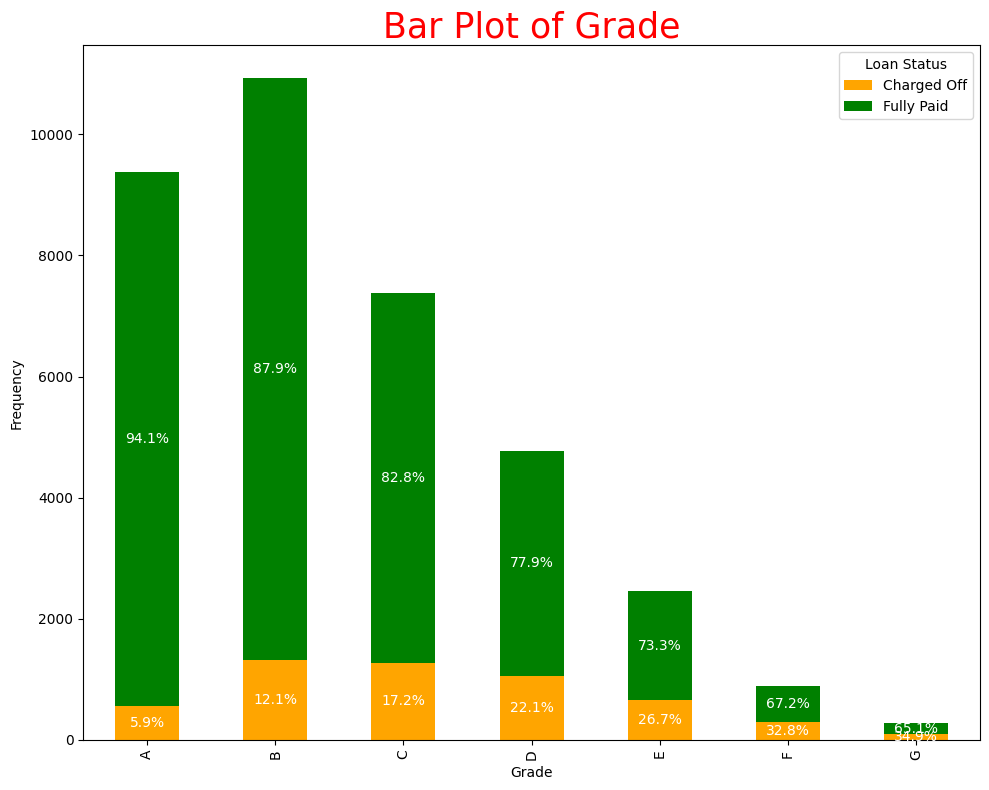

In [113]:
grouped = loan.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 8), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Grade', color='red', size=25)
plt.xlabel('Grade')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, grade in enumerate(grouped.index):
    total = grouped.loc[grade].sum()  # Total for grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[grade, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Number of applicants who charge-off is significantly less when LC Grade is A,B. 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">2. Number of applicants who charge-off is significantly higher when LC Grade is E,F and G. 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Our Recommendations:
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Lend Money to people who are in LC Grade A and B to avoid business loss
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">2. Lend Money to applicants who are in LC Grade C and D with shorter term - 36months to reduce defaulters as per our earlier analysis.
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">3. Reject applicants whose LC Grade are E,F and G</span>

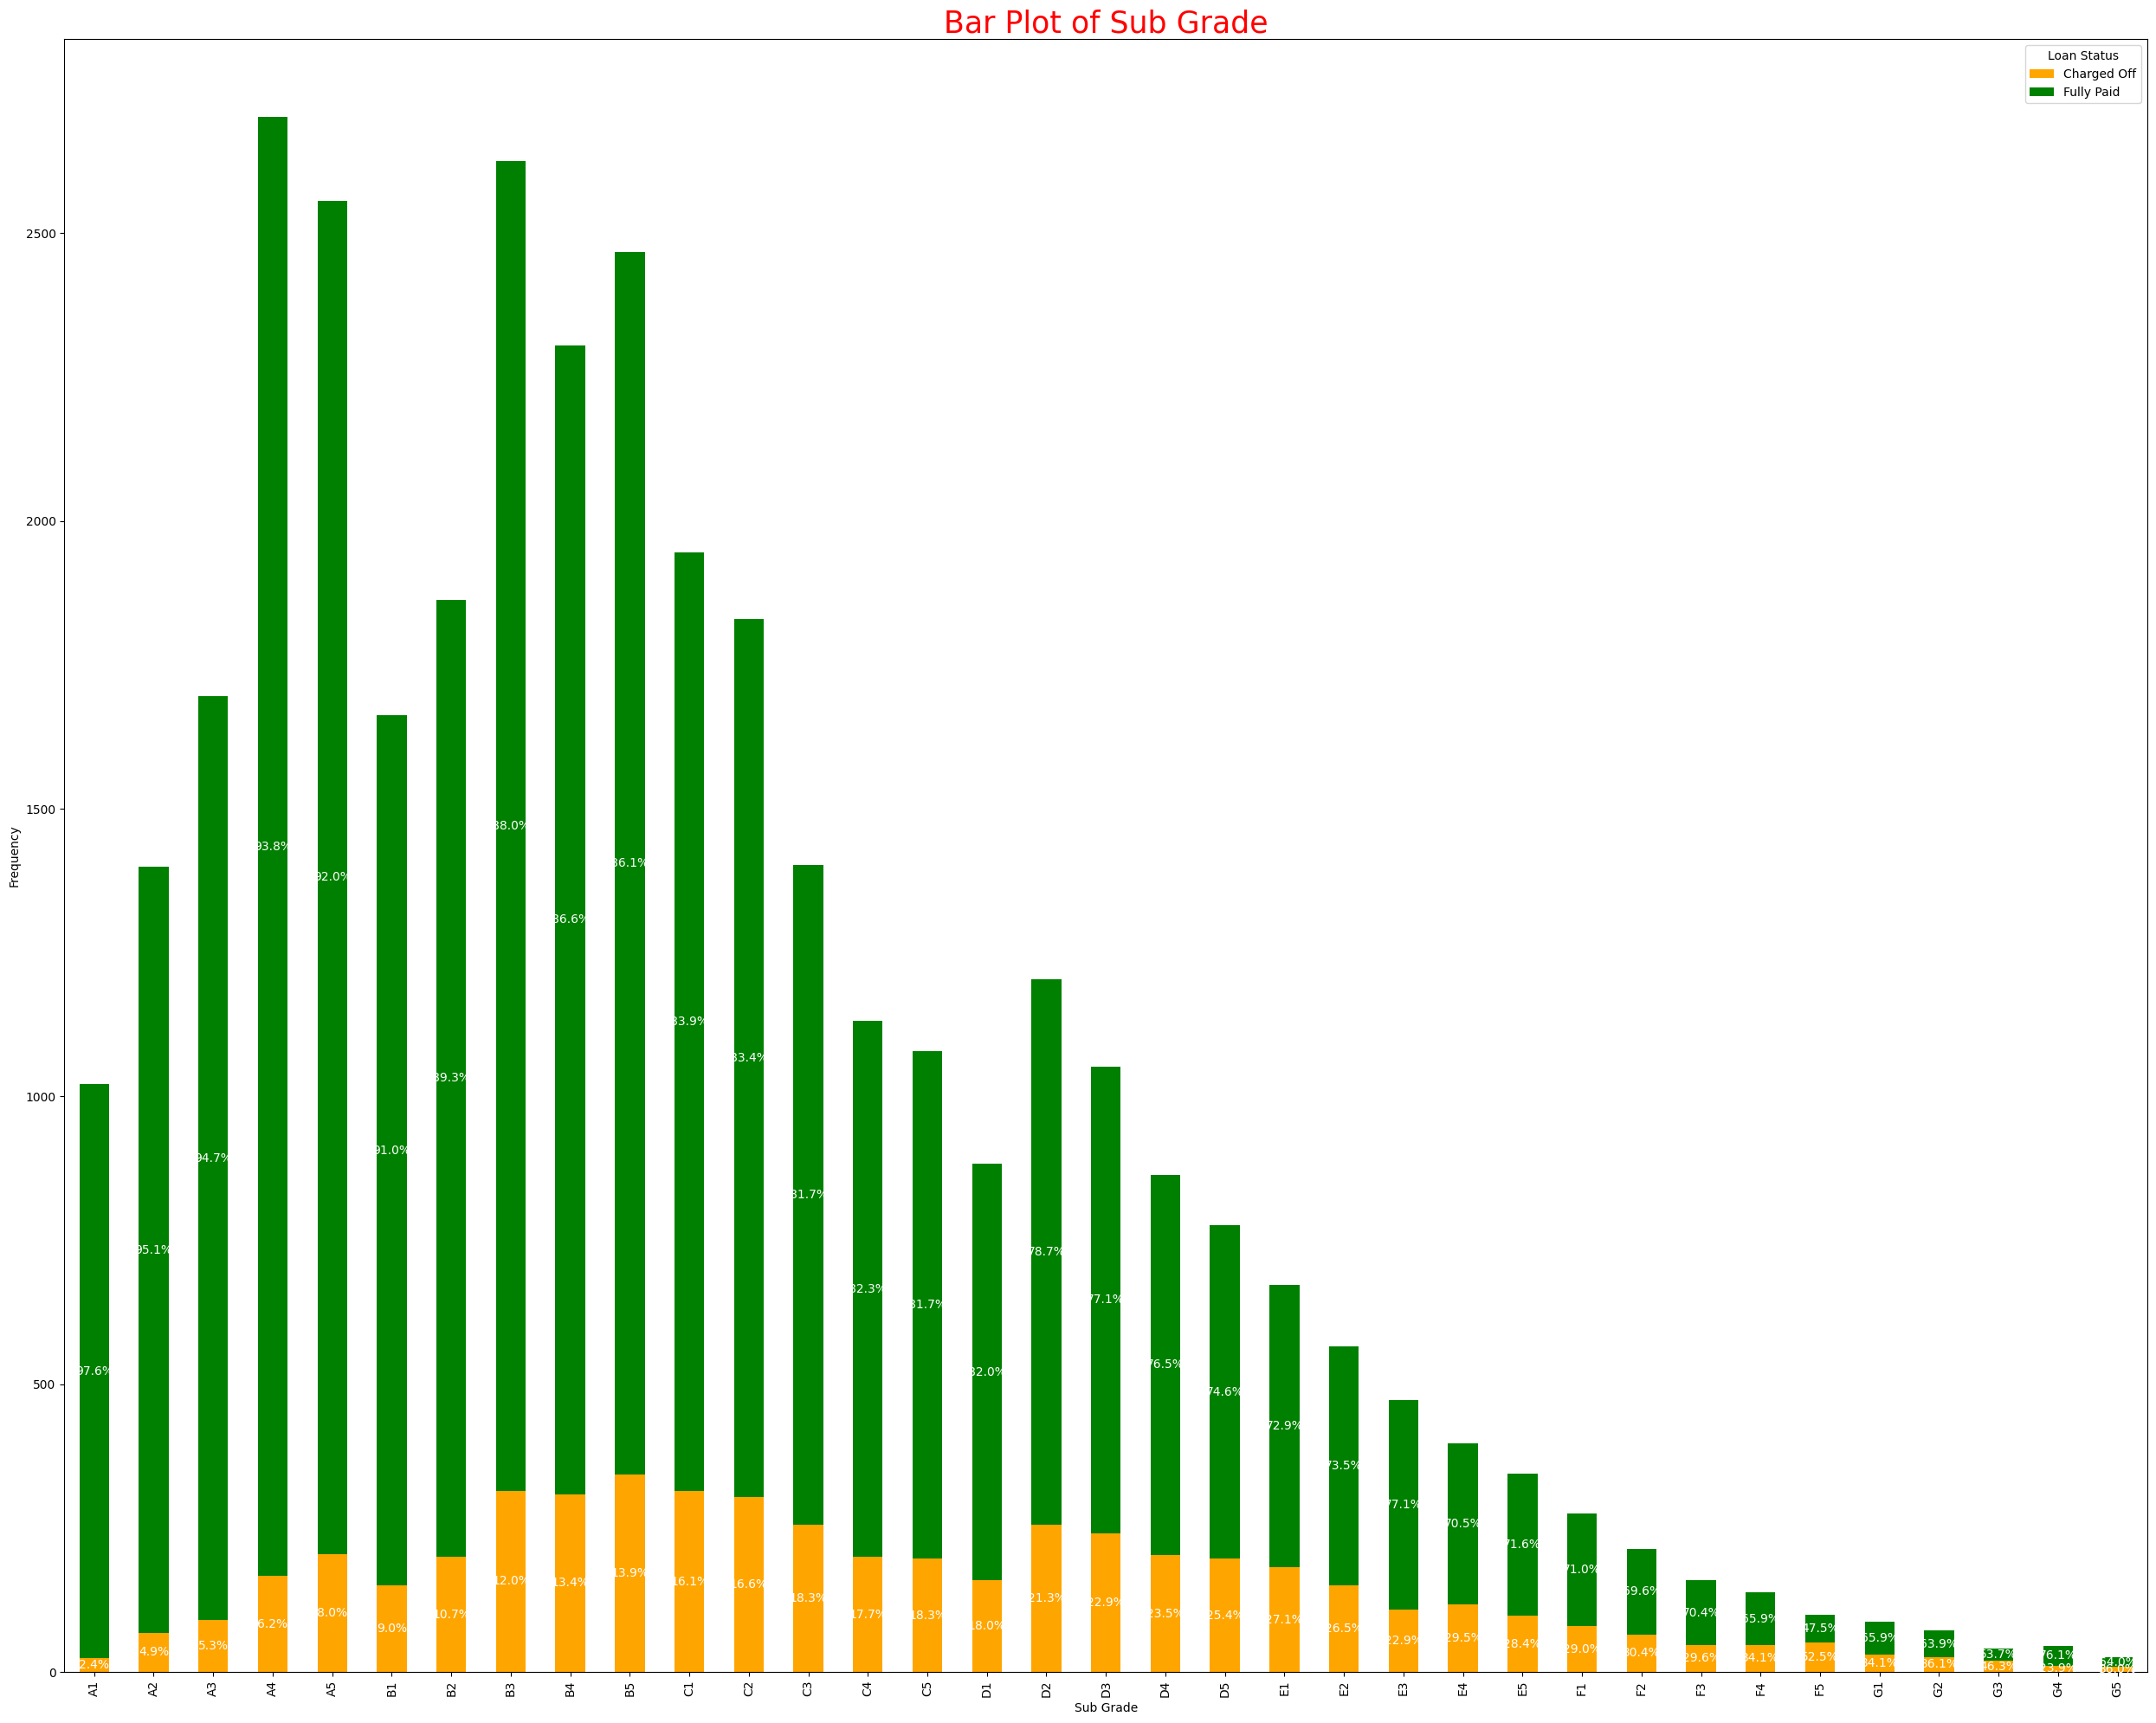

In [90]:
grouped = loan.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(25, 20), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Sub Grade', color='red', size=25)
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, sub_grade in enumerate(grouped.index):
    total = grouped.loc[sub_grade].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[sub_grade, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can observe that applicant behaviour does not vary between LC Grade and Sub_Grade</span>

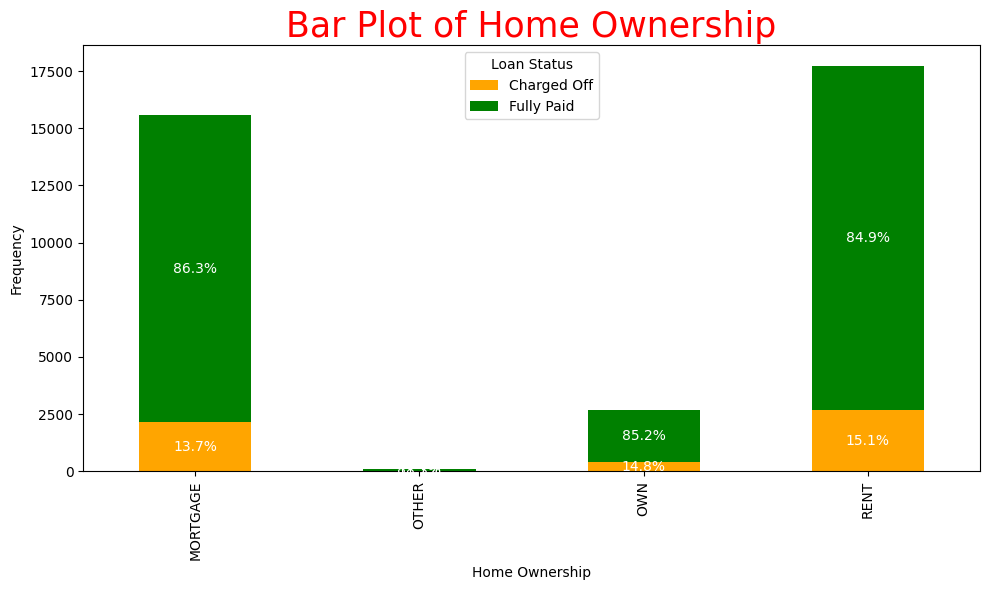

In [96]:
grouped = loan.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Home Ownership', color='red', size=25)
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, home_ownership in enumerate(grouped.index):
    total = grouped.loc[home_ownership].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[home_ownership, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Approximately in all categories of HomeOwnership 14% of the applicants charge-off
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Our Recommendations:
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">It is safe to assume that HomeOwnership does not impact the loan repayment.</span>

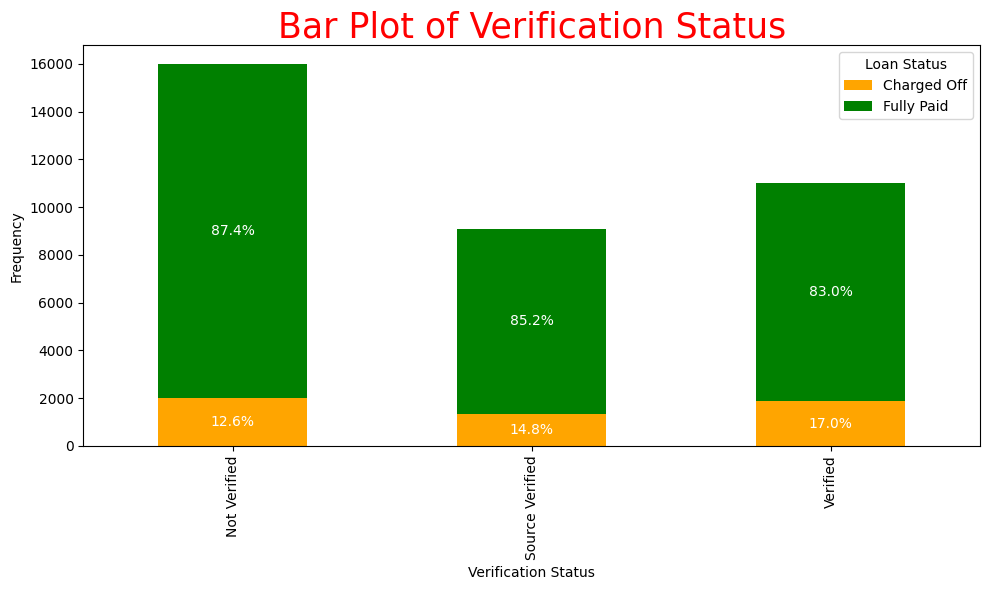

In [97]:
grouped = loan.groupby(['verification_status', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Verification Status', color='red', size=25)
plt.xlabel('Verification Status')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, verification_status in enumerate(grouped.index):
    total = grouped.loc[verification_status].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[verification_status, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

In [98]:
#Merging Source verified and Verified as the difference in percentage is very less.
loan['verification_status'].replace('Source Verified','Verified', inplace=True)

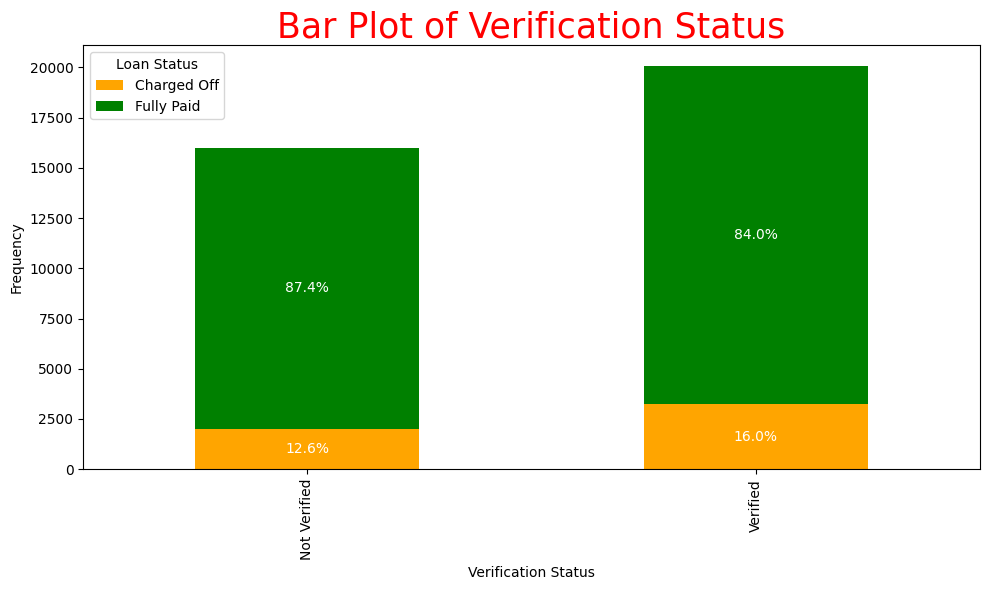

In [99]:
grouped = loan.groupby(['verification_status', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Verification Status', color='red', size=25)
plt.xlabel('Verification Status')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, verification_status in enumerate(grouped.index):
    total = grouped.loc[verification_status].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[verification_status, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can observe that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Non-Verified applicants are repaying the loan better than Verified applicants. But It cant be considered as a driving factor as the difference is not very significant.</span>

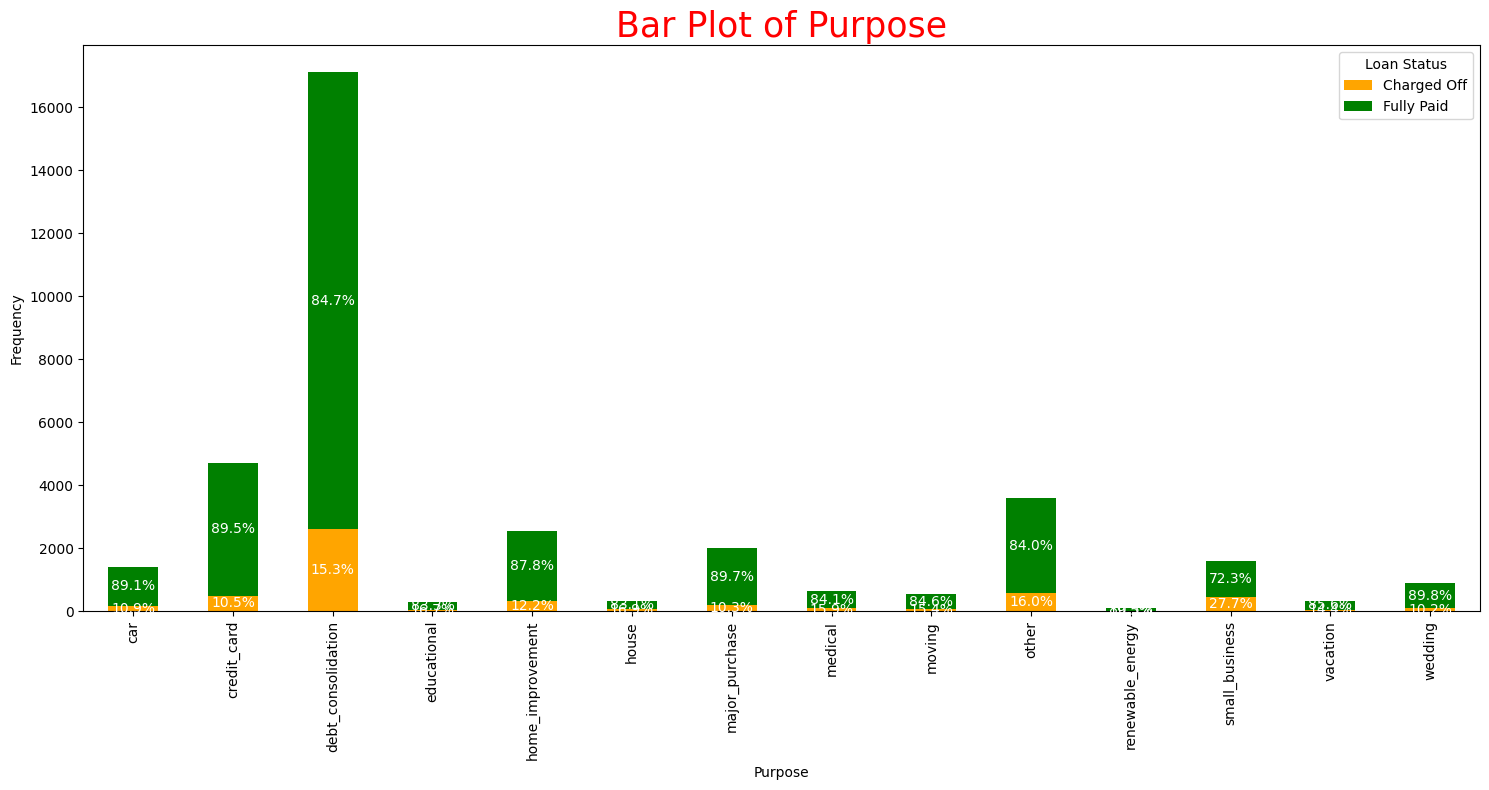

In [112]:
grouped = loan.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(15, 8), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Purpose', color='red', size=25)
plt.xlabel('Purpose')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, purpose in enumerate(grouped.index):
    total = grouped.loc[purpose].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[purpose, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Applicants taking loan for small_business and renewable energy default the most.
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Our Recommendations:
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. For applicants in small_business and renewable energy provide loans with the shorter term to avoid financial losses</span>

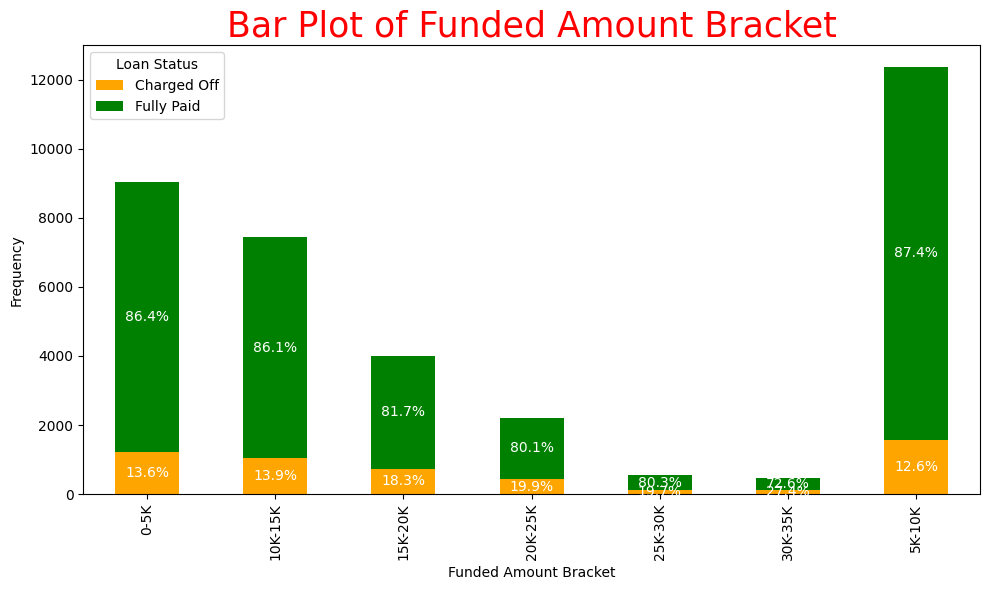

In [121]:
grouped = loan.groupby(['funded_amnt_bracket', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Funded Amount Bracket', color='red', size=25)
plt.xlabel('Funded Amount Bracket')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, funded_amnt_bracket in enumerate(grouped.index):
    total = grouped.loc[funded_amnt_bracket].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[funded_amnt_bracket, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. The funded amount is directly proportional to applicants being charged off.

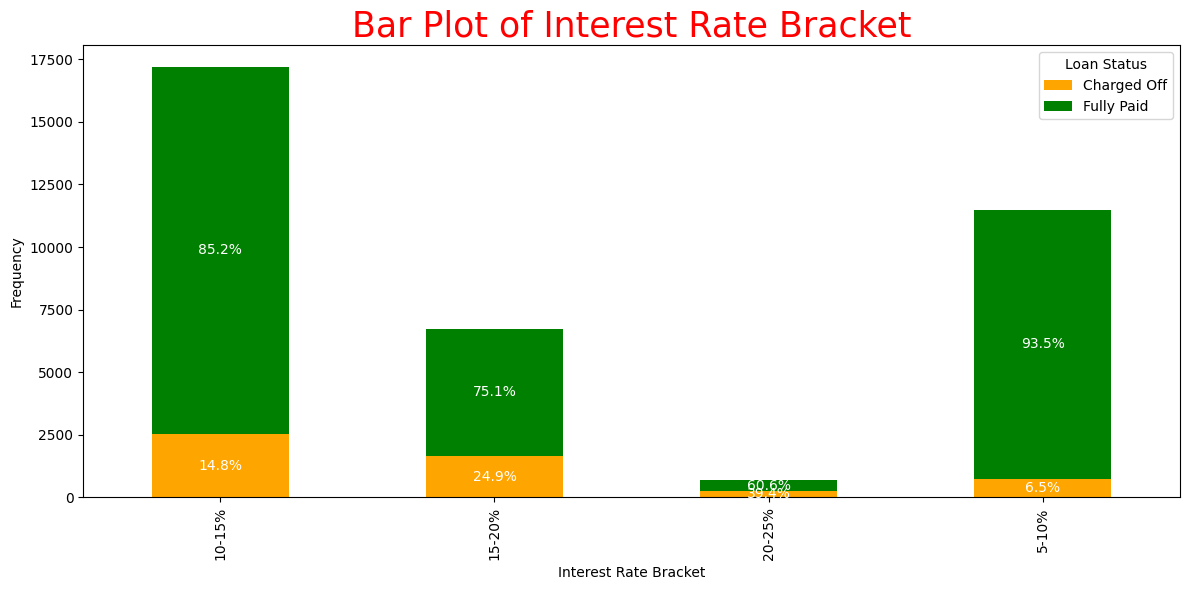

In [126]:
grouped = loan.groupby(['int_rate_bracket', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Interest Rate Bracket', color='red', size=25)
plt.xlabel('Interest Rate Bracket')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, int_rate_bracket in enumerate(grouped.index):
    total = grouped.loc[int_rate_bracket].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[int_rate_bracket, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. The Interest Rate is directly proportional to applicants being charged off.

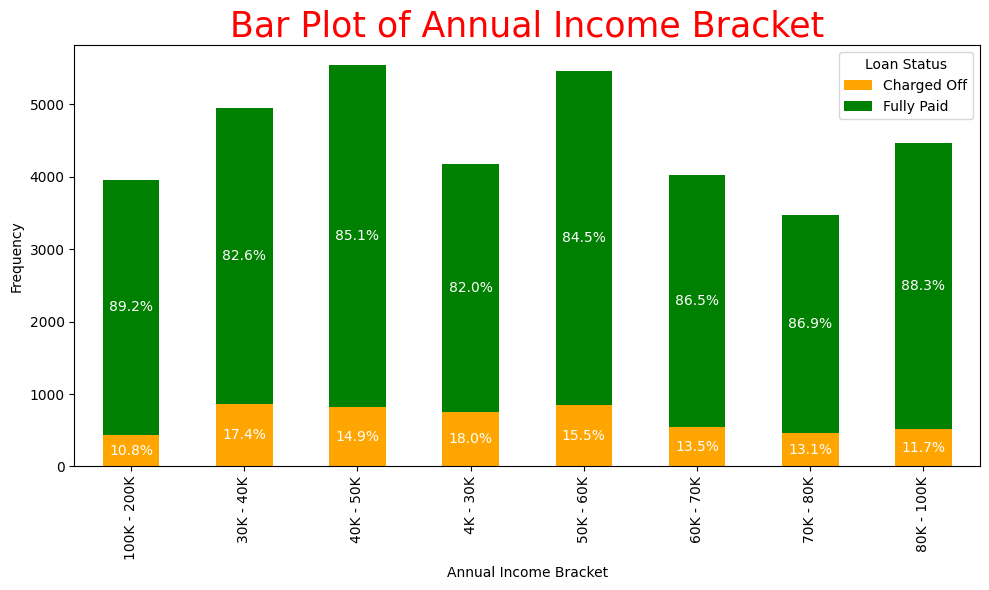

In [130]:
grouped = loan.groupby(['annual_inc_bracket', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of Annual Income Bracket', color='red', size=25)
plt.xlabel('Annual Income Bracket')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, annual_inc_bracket in enumerate(grouped.index):
    total = grouped.loc[annual_inc_bracket].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[annual_inc_bracket, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. The Applicant's annual income is inversely proportional to applicants being charged off.

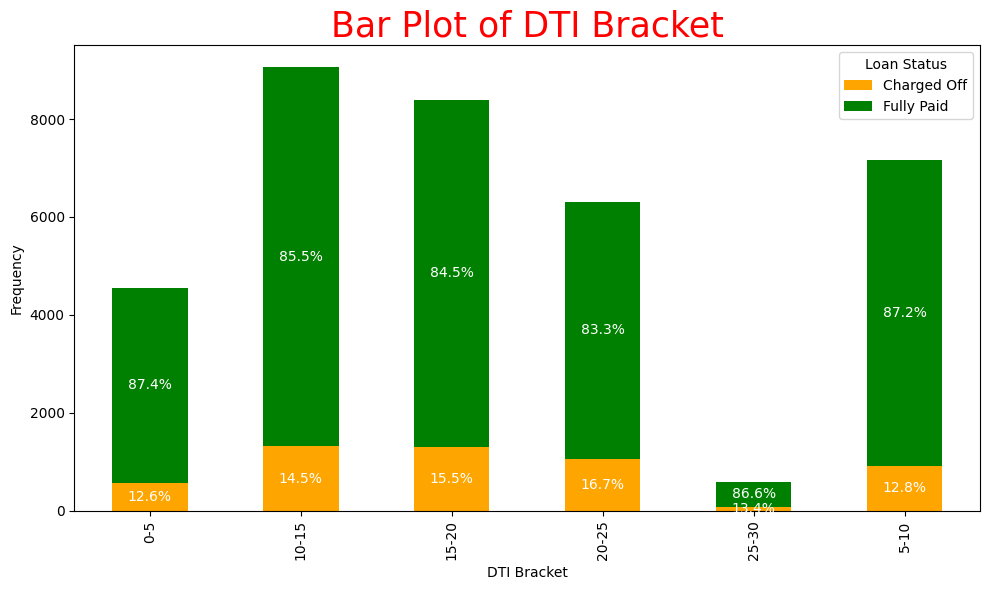

In [131]:
grouped = loan.groupby(['dti_bracket', 'loan_status']).size().unstack(fill_value=0)

# Plot stacked bar chart with actual frequencies
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'green'])

# Add title and labels
plt.title('Bar Plot of DTI Bracket', color='red', size=25)
plt.xlabel('DTI Bracket')
plt.ylabel('Frequency')

# Add percentage annotations on each stack
for i, dti_bracket in enumerate(grouped.index):
    total = grouped.loc[dti_bracket].sum()  # Total for this sub_grade
    bottom = 0  # Bottom of the stack
    for loan_status in grouped.columns:
        value = grouped.loc[dti_bracket, loan_status]
        percentage = (value / total) * 100 if total > 0 else 0
        plt.text(
            i,  # Bar position
            bottom + value / 2,  # Center of the current stack
            f'{percentage:.1f}%',  # Percentage text
            ha='center', va='center', color='white', fontsize=10
        )
        bottom += value  # Update bottom for the next stack

# Customize legend
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. The Debt-to-Income Ratio is directly proportional to applicants being charged off.

## <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Univariate Analysis Findings</span>

1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">85.47% of total applicants fully pay off the loan and 14.53% dont. We should aim to loan to people having similar characteristics as the 85.47% to avoid being at financial loss.
1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Few driving variables which will help in this decision are : 
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Term - Applicants charge off more as the term increases - Lend Money to applicants at short terms, here:36 months to avoid financial loss
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Loan Issued month - Applicants taking loan in November or December     default the highest. The reason for this could be Holiday(Black Friday, Christmas) season. It is recommended to lend money in the initial month's of the years (January-April)
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Grade -  
        1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Lend Money to people who are in LC Grade A and B to avoid business loss
       1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold"> Lend Money to applicants who are in LC Grade C and D with shorter term - 36months to reduce defaulters as per our earlier analysis.
        1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Reject applicants whose LC Grade are E,F and G
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Purpose - Applicants taking loan for small_business and renewable energy default the most.
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Funded Amount -  The funded amount is directionally proportional to applicants being Charged OFF.
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Interest Rate - The interest rate is directionally proportional to applicants being Charged OFF
    1. <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Annual Income -  The applicant's annual income is inversely proportional to being Charged OFF


## <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Bivariate Analysis</span>

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Checking the relation of Funded Amount with other attributes</span>

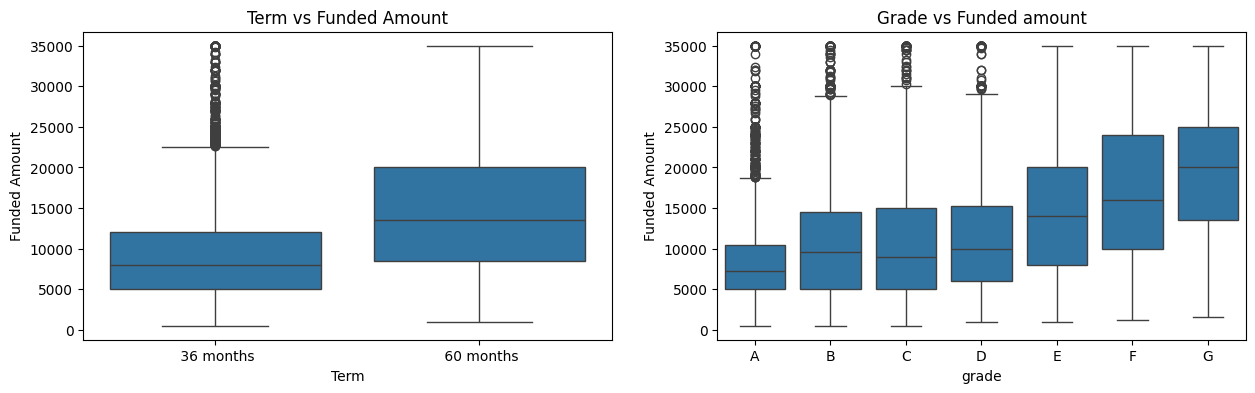

In [134]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="funded_amnt", data=loan)
plt.title("Term vs Funded Amount")
plt.xlabel('Term')
plt.ylabel('Funded Amount')
plt.subplot(1,2,2)
sns.boxplot(x="grade", y="funded_amnt", data=loan, order=['A','B','C','D','E','F','G'])
plt.title("Grade vs Funded amount")
plt.xlabel('grade')
plt.ylabel('Funded Amount')
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Funded Amount is directly proportional to term of the loan.
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">2. Funded Amount is directly proportional to Grades.

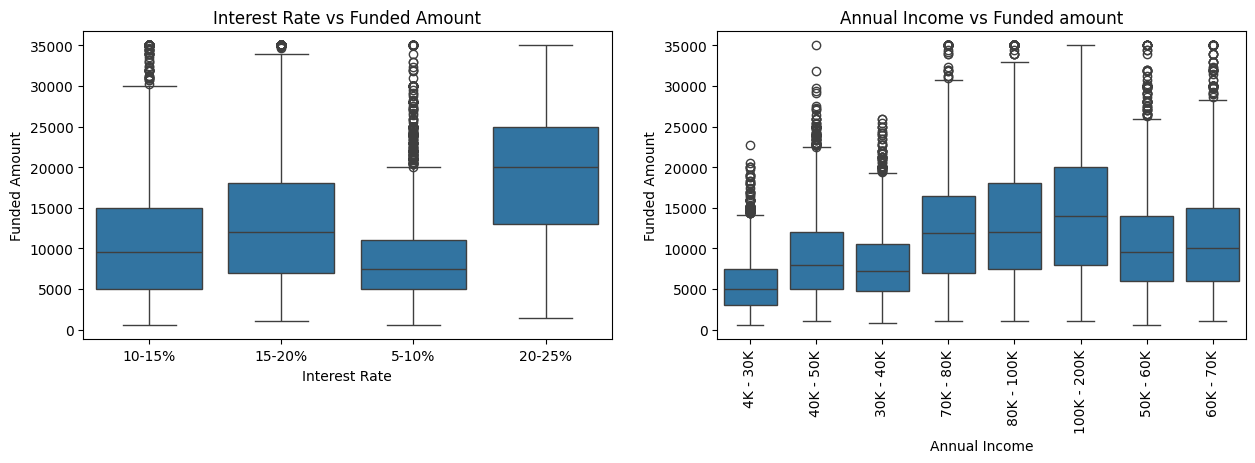

In [137]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="int_rate_bracket", y="funded_amnt", data=loan)
plt.title("Interest Rate vs Funded Amount")
plt.xlabel('Interest Rate')
plt.ylabel('Funded Amount')
plt.subplot(1,2,2)
sns.boxplot(x="annual_inc_bracket", y="funded_amnt", data=loan)
plt.title("Annual Income vs Funded amount")
plt.xlabel('Annual Income')
plt.ylabel('Funded Amount')
plt.xticks(rotation=90)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Funded Amount is directly proportional to interest rate.
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">2. Funded Amount is directly proportion to Annual income.

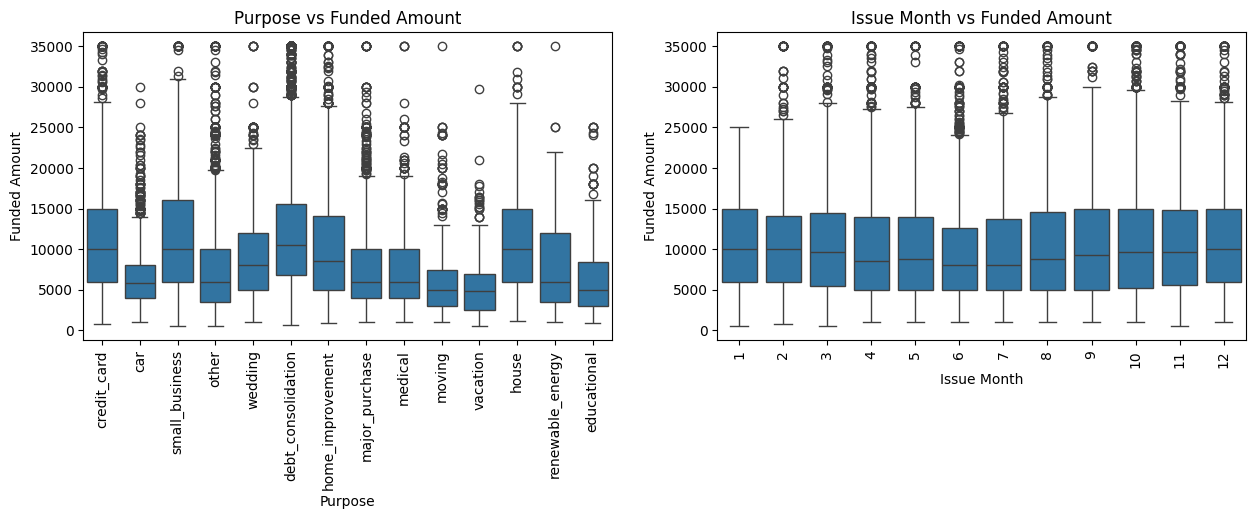

In [136]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="purpose", y="funded_amnt", data=loan)
plt.title("Purpose vs Funded Amount")
plt.xlabel('Purpose')
plt.ylabel('Funded Amount')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x="issue_mon", y="funded_amnt", data=loan)
plt.title("Issue Month vs Funded Amount")
plt.xlabel('Issue Month')
plt.ylabel('Funded Amount')
plt.xticks(rotation=90)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Funded Amount is higher for purposes like - Small business, debt-consolidation,credit card and home imporovement.
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">2. Funded Amount is does not vary across months.

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Checking the relation of Interest Rate with other attributes</span>

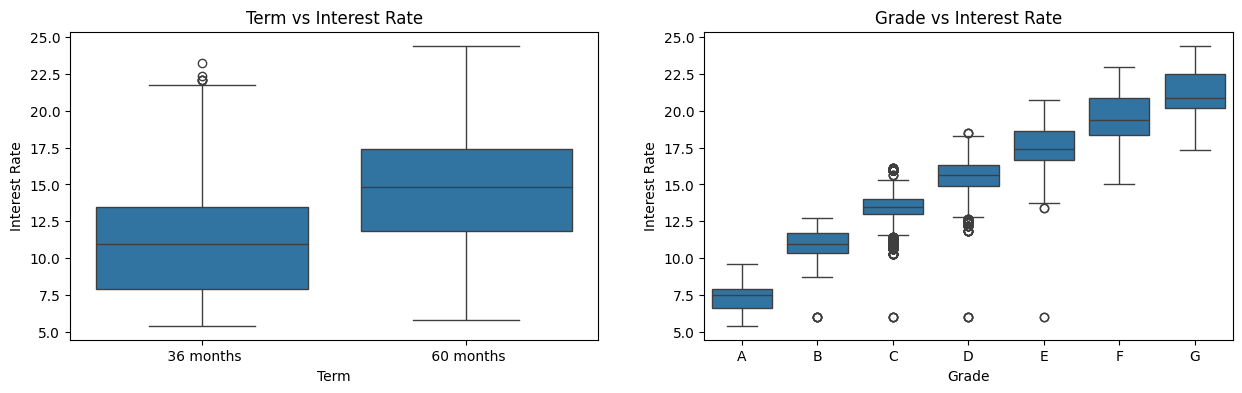

In [138]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=loan)
plt.title("Term vs Interest Rate")
plt.xlabel('Term')
plt.ylabel('Interest Rate')
plt.subplot(1,2,2)
sns.boxplot(x="grade", y="int_rate", data=loan,order=['A','B','C','D','E','F','G'])
plt.title("Grade vs Interest Rate")
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Interest Amount is directly proportional to Term and Grade 

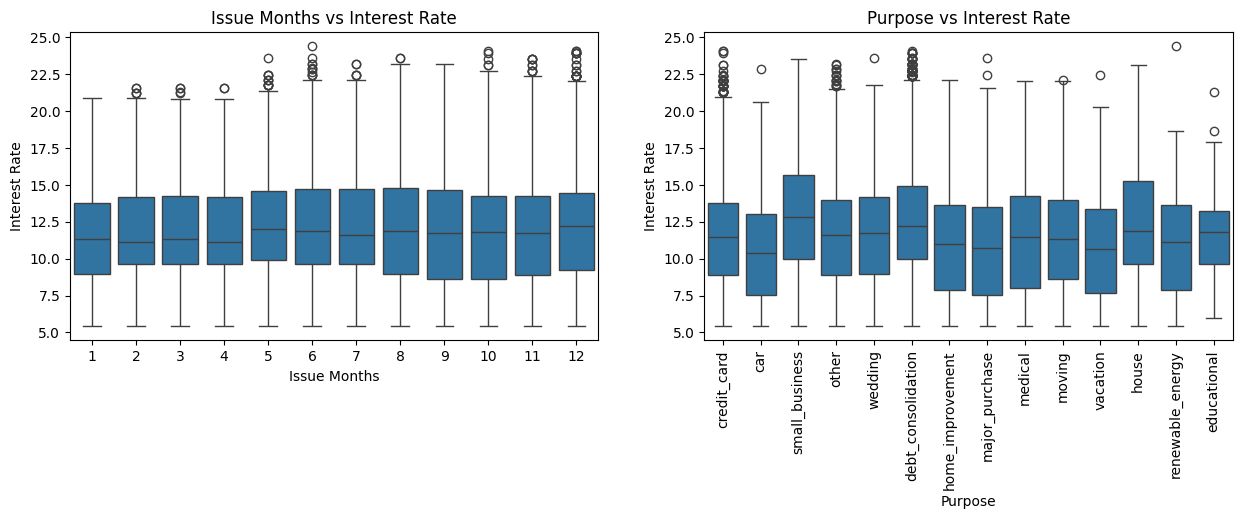

In [140]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_mon", y="int_rate", data=loan)
plt.title("Issue Months vs Interest Rate")
plt.xlabel('Issue Months')
plt.ylabel('Interest Rate')
plt.subplot(1,2,2)
sns.boxplot(x="purpose", y="int_rate", data=loan)
plt.title("Purpose vs Interest Rate")
plt.xlabel('Purpose')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Interest rate is higher for small business, debt consolidation and house.
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">2. Interest rate doesnt vary across months

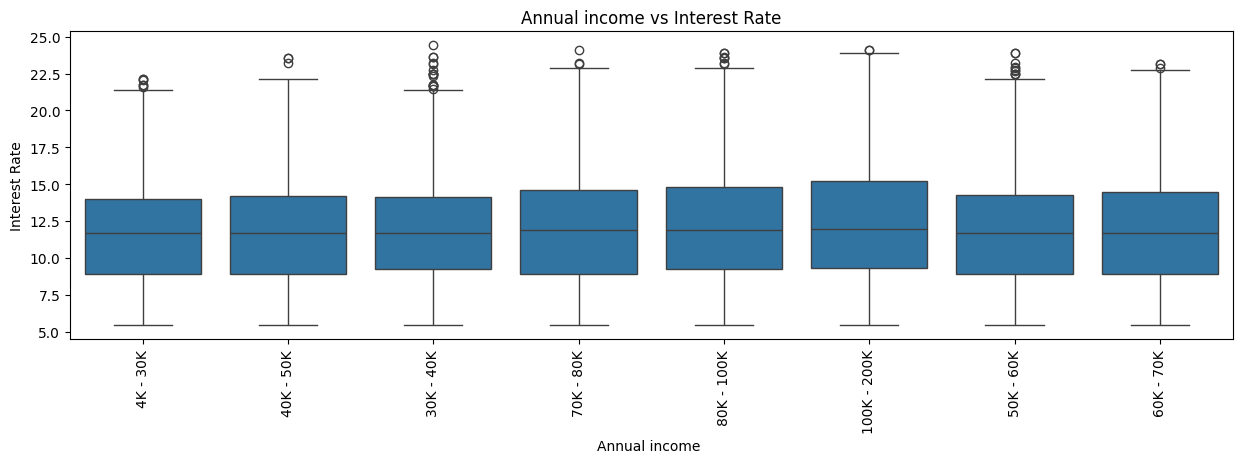

In [142]:
plt.figure(figsize=(15,4))
sns.boxplot(x="annual_inc_bracket", y="int_rate", data=loan)
plt.title("Annual income vs Interest Rate")
plt.xlabel('Annual income ')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">We can derive that: 
#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold">1. Interest rate doesnt vary across annual income

## <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Multivariate Analysis</span>

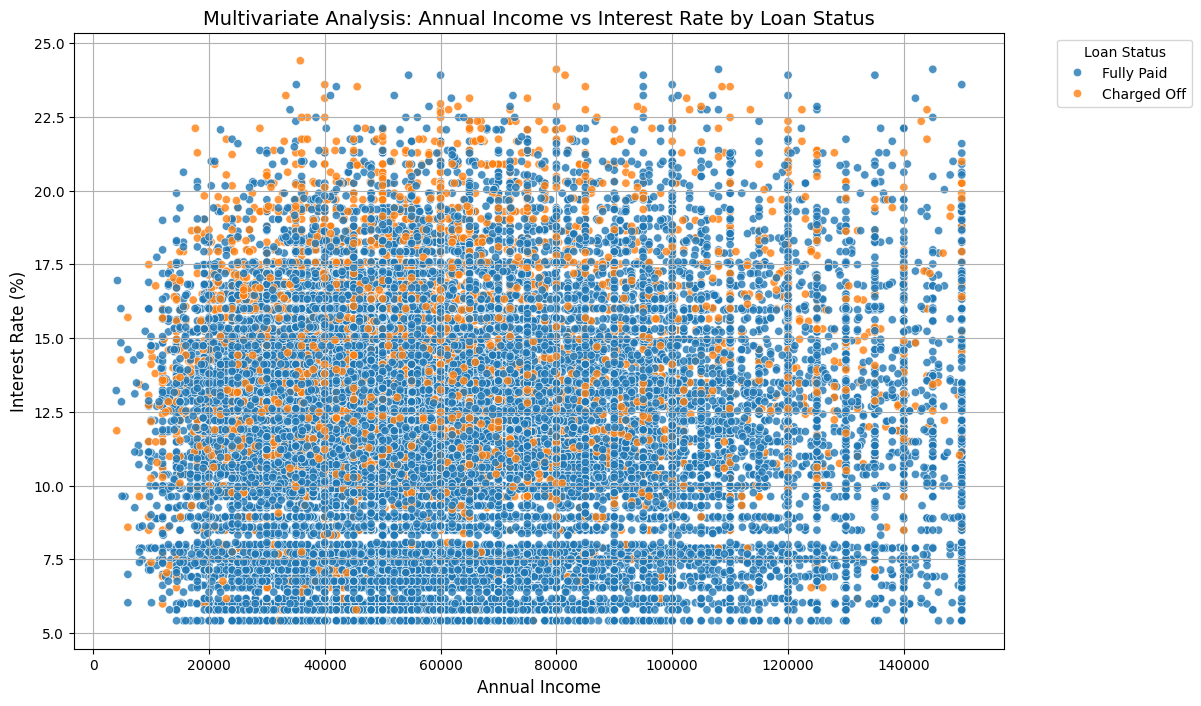

In [145]:
# Create a multivariate scatter plot using hue and size to encode additional variables
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan,
    x='annual_inc',
    y='int_rate',
    hue='loan_status',  # Encode loan status using color
    sizes=(20, 200),  # Scale for point sizes
    alpha=0.8,  # Transparency for better visualization
)

# Customize the chart
plt.title("Multivariate Analysis: Annual Income vs Interest Rate by Loan Status", fontsize=14)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold"> We can derive that: </span>
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">The applicants tend to Charged OFF as the Interest Rate increases</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">The applicants tend to pay off Loans are higher for the Interest Rate is less than or equal 10% across their Annual Income
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">The Interest Rate 10% to 15% Charged OFF gradually decreases as Annual Income increases
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Above 17.5% Interest Rate, the Applicants across all the Annual Income Bracket tend to Charged OFF


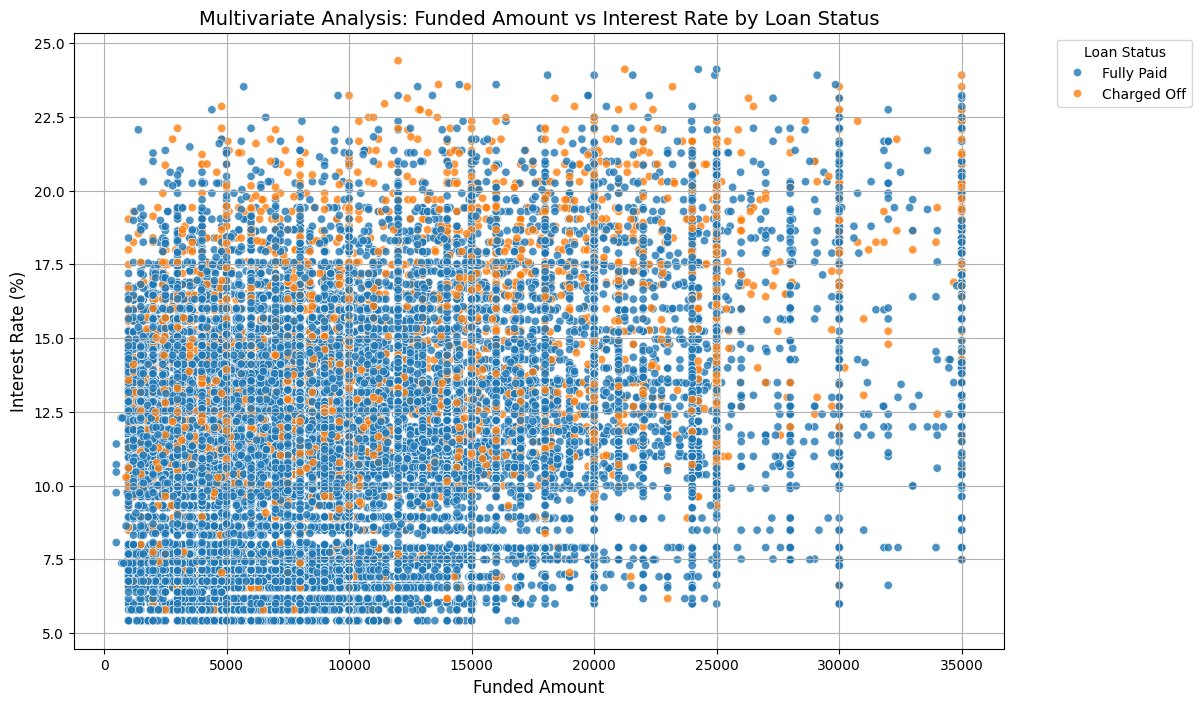

In [146]:
# Create a multivariate scatter plot using hue and size to encode additional variables
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan,
    x='funded_amnt',
    y='int_rate',
    hue='loan_status',  # Encode loan status using color
    sizes=(20, 200),  # Scale for point sizes
    alpha=0.8,  # Transparency for better visualization
)

# Customize the chart
plt.title("Multivariate Analysis: Funded Amount vs Interest Rate by Loan Status", fontsize=14)
plt.xlabel("Funded Amount", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold"> We can derive that: </span>
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Applicants tend to pay off loans as long as the amount and the interest rate are less
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">for an example: the funded amount is as high as 35000 and the interest rate is 10%.
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">The Charged OFF increases when the interest rate is above 15%


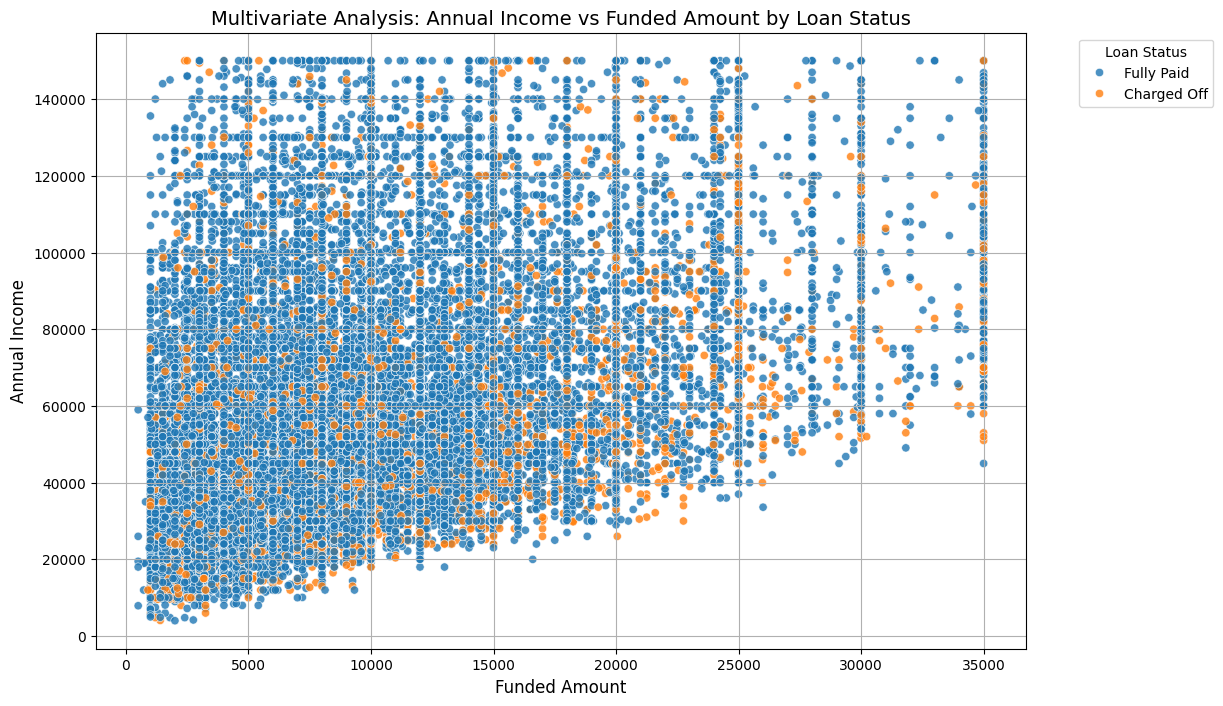

In [147]:
# Create a multivariate scatter plot using hue and size to encode additional variables
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=loan,
    x='funded_amnt',
    y='annual_inc',
    hue='loan_status',  # Encode loan status using color
    sizes=(20, 200),  # Scale for point sizes
    alpha=0.8,  # Transparency for better visualization
)

# Customize the chart
plt.title("Multivariate Analysis: Annual Income vs Funded Amount by Loan Status", fontsize=14)
plt.xlabel("Funded Amount", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold"> We can derive that: </span>
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">The applicants pay off the loan when the funded amount is less than 15000
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">The applicants Charged OFF when the funded amount is more than 15000 and the annual income is less than 80000
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">The applicants pay off the loan when their annual income is more than 80000 and the funded amount is as high as 35000


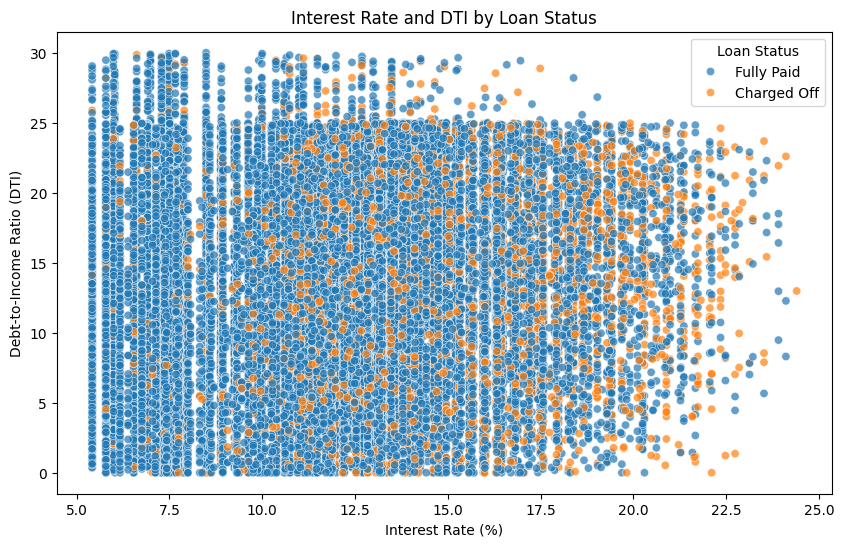

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=loan, 
    x='int_rate', 
    y='dti', 
    hue='loan_status',
    alpha=0.7
)
plt.title('Interest Rate and DTI by Loan Status')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.legend(title='Loan Status')
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold"> We can derive that: </span>
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">When interest rate is low, applicant across all DTIs are paying off the loans.
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">The applicants Charged OFF when the interest rate increases across all DTIs

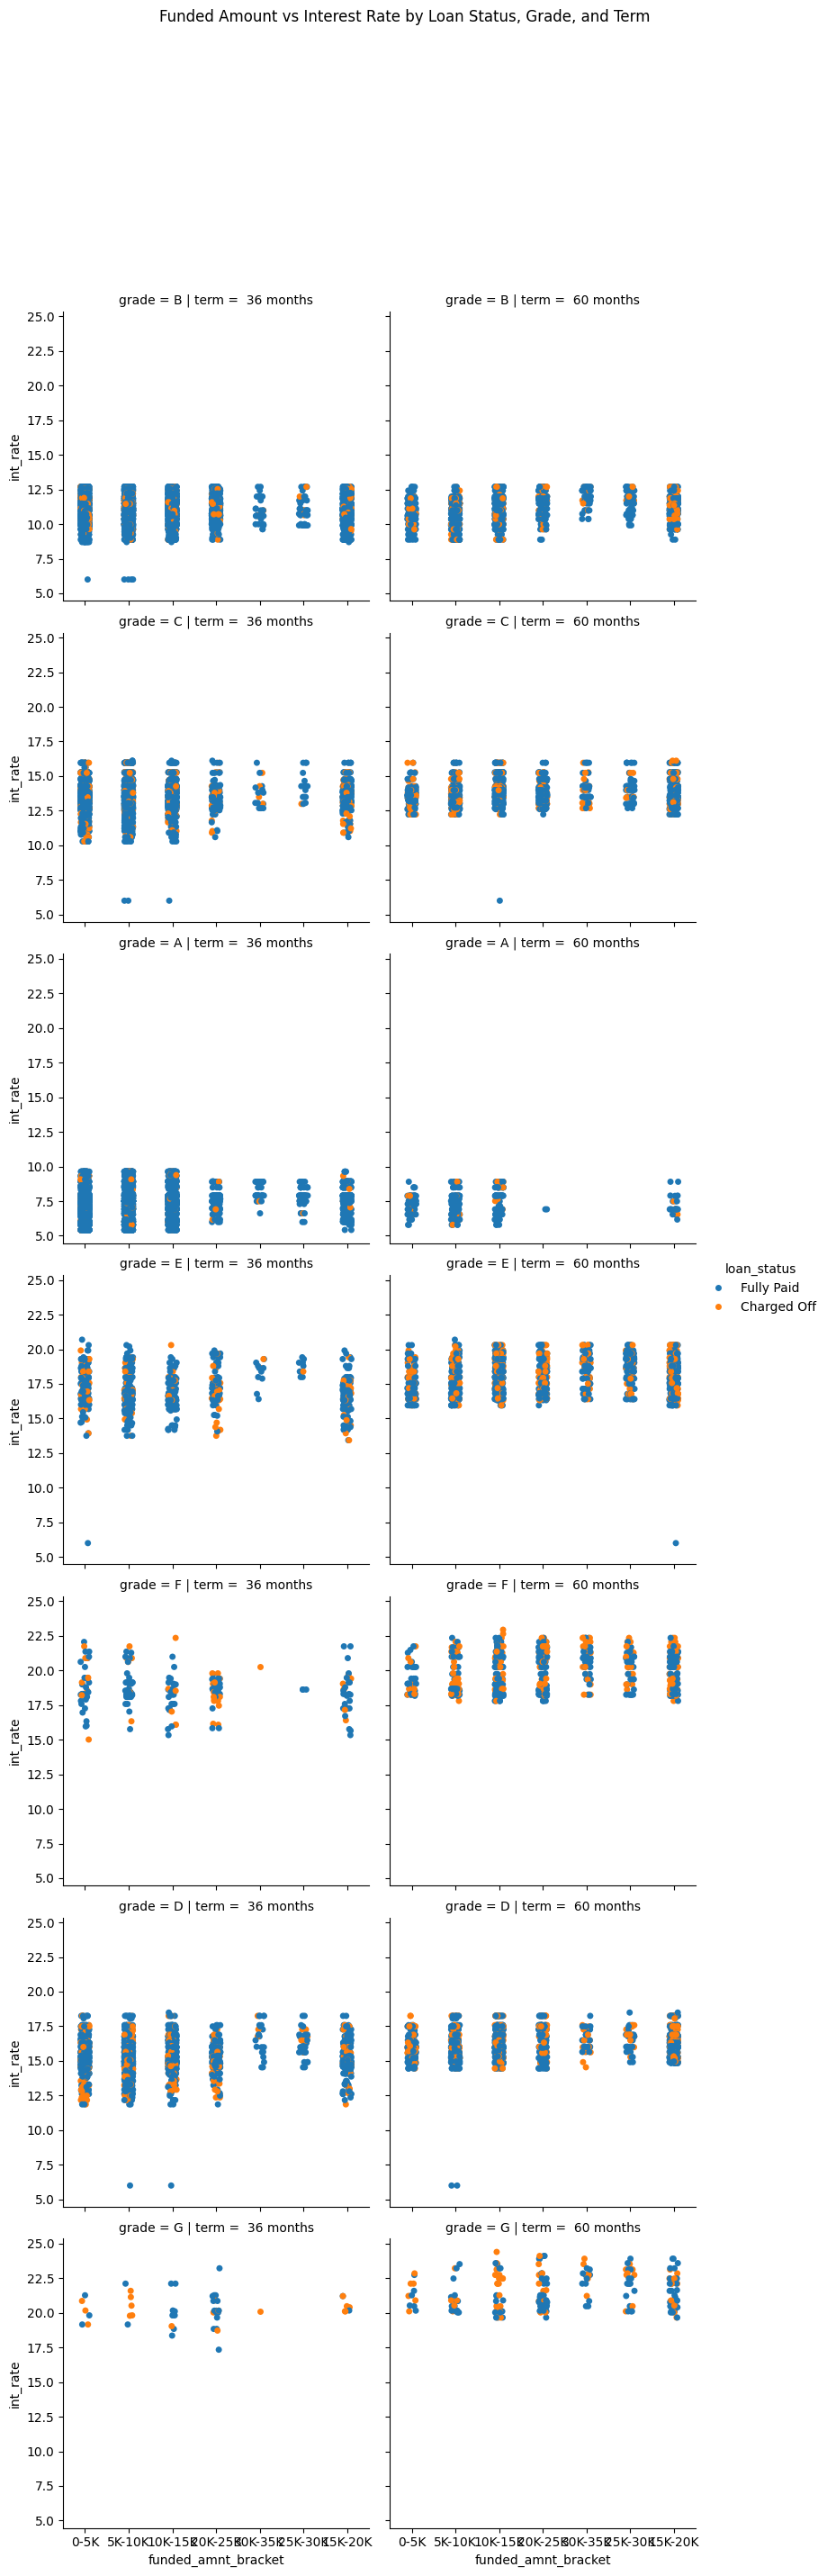

In [158]:
sns.catplot(
    data=loan,
    x='funded_amnt_bracket', 
    y='int_rate', 
    hue='loan_status', 
    col='term', 
    row='grade',
    kind='strip',
    height=4, 
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Funded Amount vs Interest Rate by Loan Status, Grade, and Term', y=1.02)
plt.show()

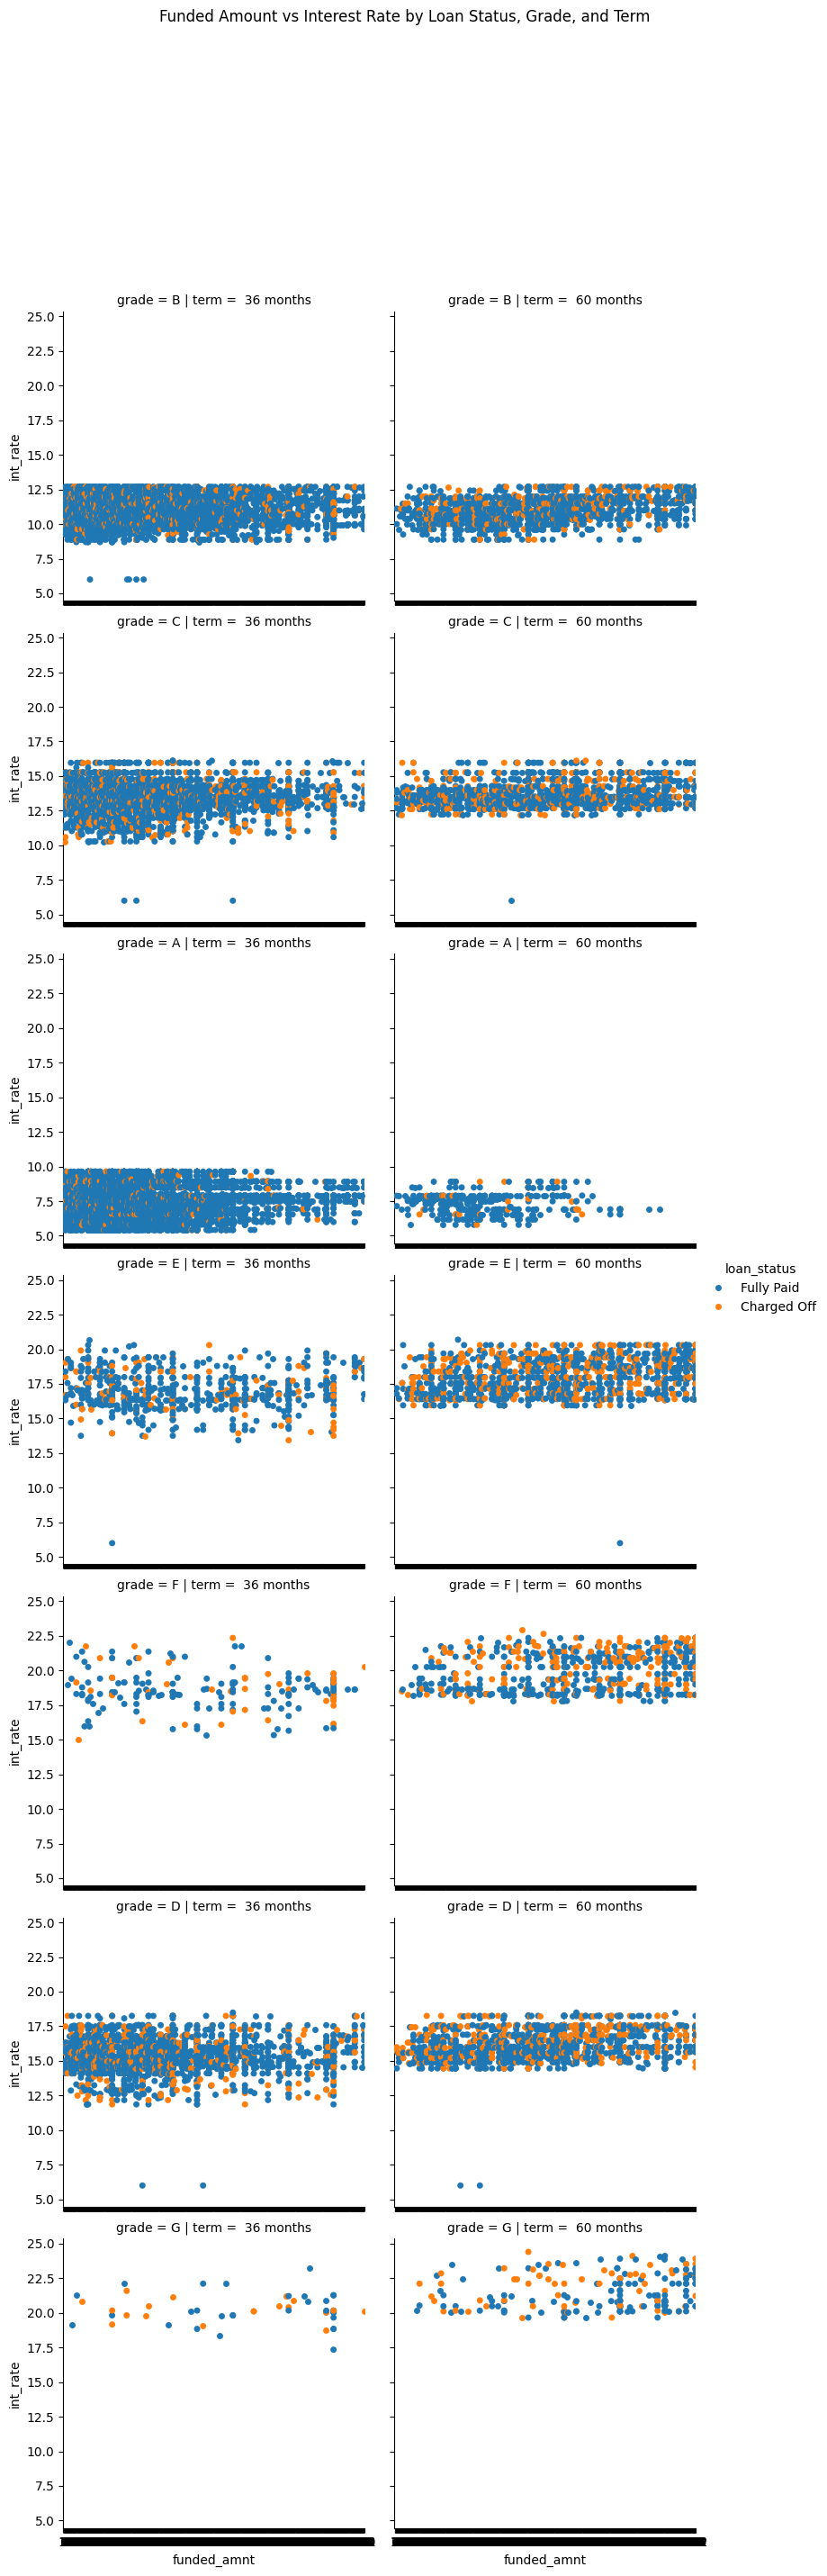

In [159]:
sns.catplot(
    data=loan,
    x='funded_amnt', 
    y='int_rate', 
    hue='loan_status', 
    col='term', 
    row='grade',
    kind='strip',
    height=4, 
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Funded Amount vs Interest Rate by Loan Status, Grade, and Term', y=1.02)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold"> We can derive that: </span>
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">When term is 36 months, we see higher applicants paying off loans across * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">various interest rates,grades and funded amount
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">When term is 60 months we see higher applicants charged off. Especially in * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Grade E,F and G

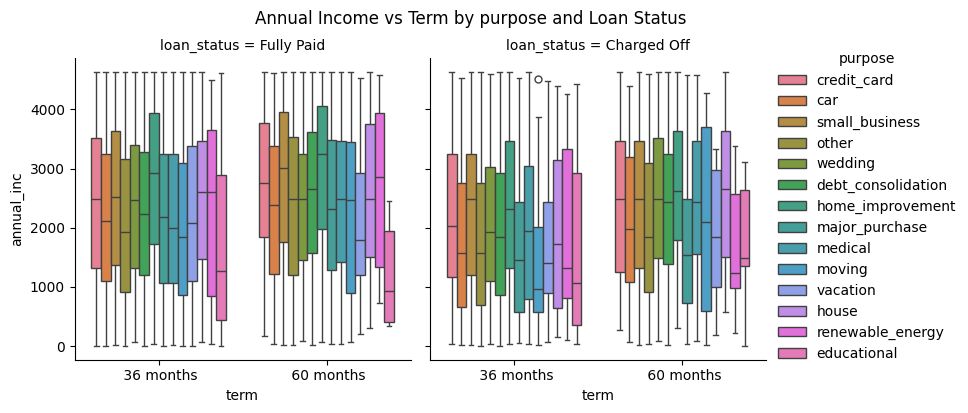

In [157]:
sns.catplot(
    data=loan,
    x='term',
    y='annual_inc',
    hue='purpose',
    col='loan_status',
    kind='box',
    height=4,
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Annual Income vs Term by purpose and Loan Status', y=1.02)
plt.show()

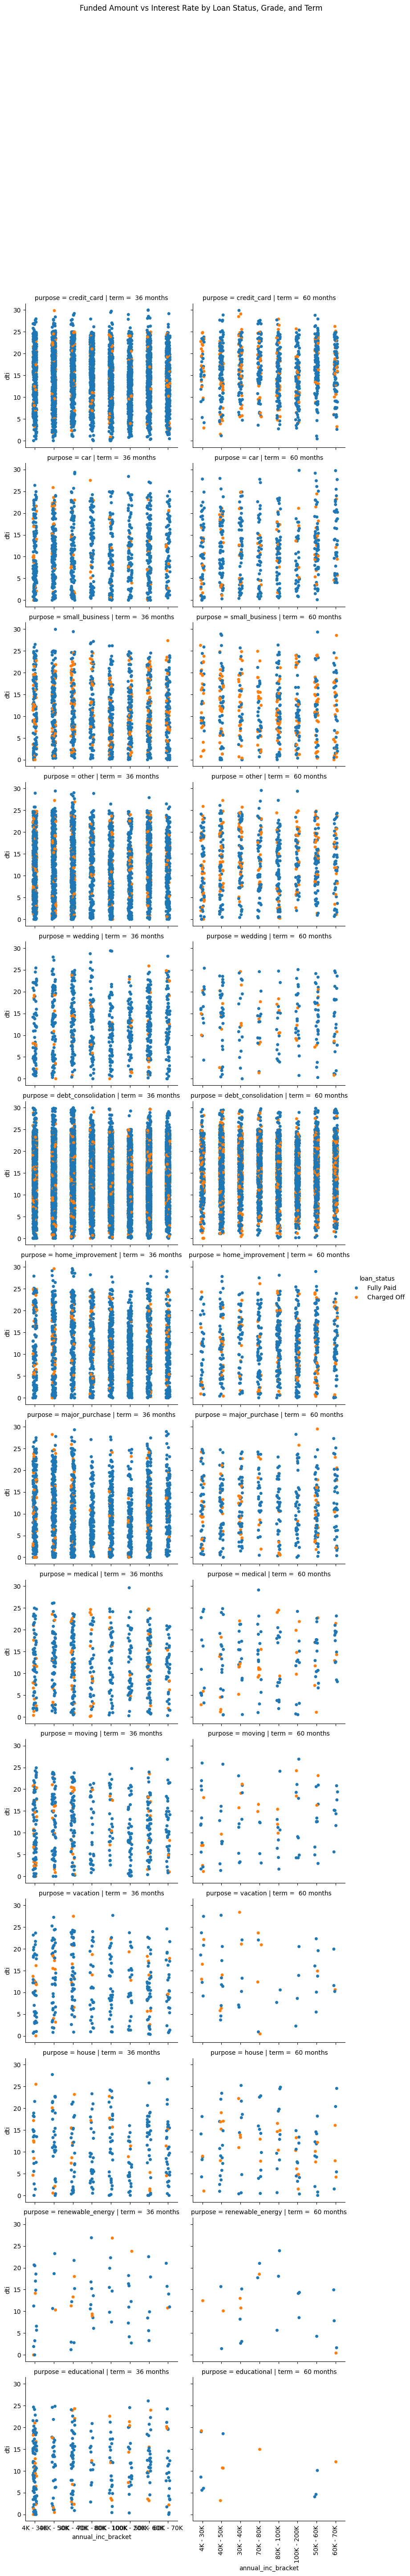

In [162]:
sns.catplot(
    data=loan,
    x='annual_inc_bracket', 
    y='dti', 
    hue='loan_status', 
    col='term', 
    row='purpose',
    kind='strip',
    height=4, 
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Funded Amount vs Interest Rate by Loan Status, Grade, and Term', y=1.02)
plt.xticks(rotation=90)
plt.show()

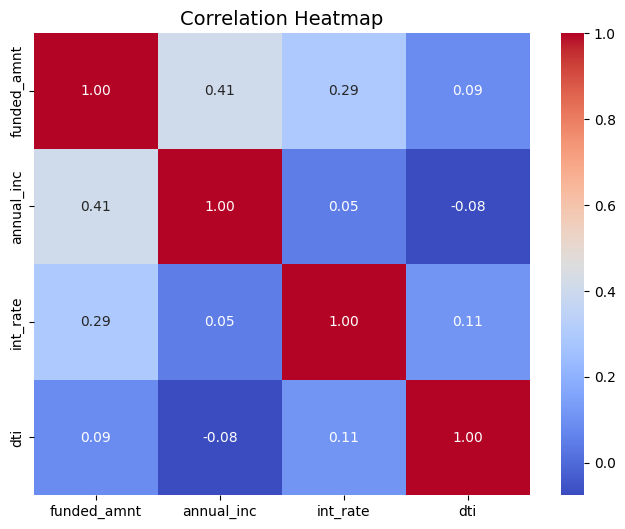

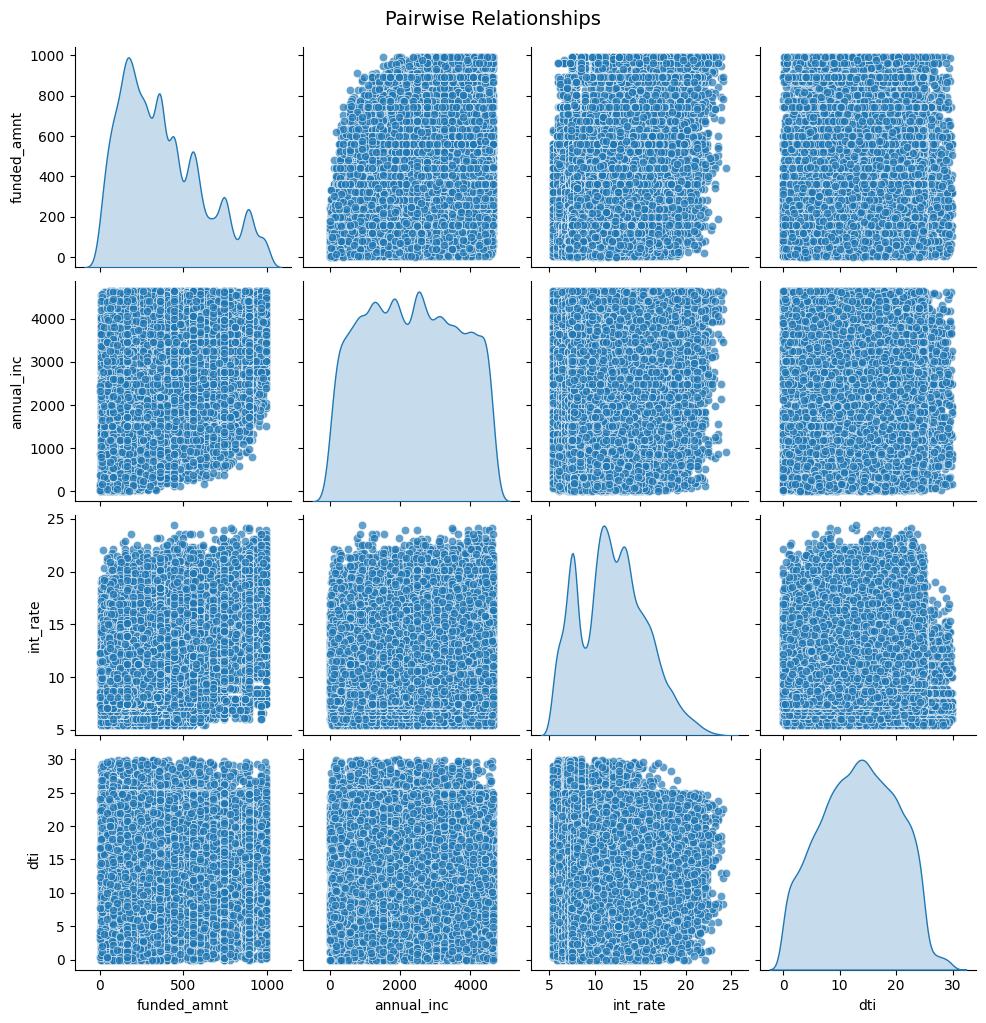

In [155]:
# Annual Income, Funded Amount
loan['annual_inc'] = loan['annual_inc'].astype('category').cat.codes
loan['funded_amnt'] = loan['funded_amnt'].astype('category').cat.codes

# Select relevant columns for correlation analysis
correlation_columns = ['funded_amnt', 'annual_inc', 'int_rate', 'dti']
correlation_data = loan[correlation_columns]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# 1. Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# 2. Pairplot for pairwise relationships
sns.pairplot(correlation_data, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise Relationships", y=1.02, fontsize=14)
plt.show()

#### <span style=" font-family:'abadi';font-style:italic;font-weight : bold"> We can derive that: </span>
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">The correlation heatmap shows that the attributes are weakly correlated</span>

## <span style="color:blue; font-weight : bold; font-family:'Times New Roman';">Business Conclusion and Recommendations</span>
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Funded Amount 
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Financial Loss - Lend loans with smaller amounts (below 15000) in order to avoid financial loss, as they are highly being paid off rather than charged off.
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Business Loss - To avoid business loss, though you lend loans with amount > 15000 - consider lending when
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Interest rate is less than 10%
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Annual Income is above 80000
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Interest Rate
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Financial Loss - Lend loans with lesser interest rates - below 10% to avoid financial loss, as they are highly being paid off rather than charged off.
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Business Loss - To avoid business loss, though you lend loans with interest rate above 15% - consider lending when
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Funded Amount should be less than 15000
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Annual Income is above 80000
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Annual Income
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Financial Loss - Lend loans to people with income above 80000 as they are highly paying off the loans in most situations.
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Business Loss - To avoid business loss, when lending to people with low income - consider lending when
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Consider purpose is not home improvement, renewable energy, small business, wedding.
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Term should be 36 months
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">DTI
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Financial Loss - Lend loans to people with DTI below 10 as they are highly paying off the loans in most situations.
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Business Loss - To avoid business loss, when lending to people with DTI above 10 - consider lending when
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Interest rate is low - below 10%
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Term should be 36 months, Grade either A or B
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Purpose
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Financial Loss - Lend loan to people in categories other than small business, renewable energy, debt_consolidation, home improvement as they do not charge off much.
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Business Loss - To avoid business loss, when lending to people in above purpose - consider lending when
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Term should be 36 months
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">DTI should be less than 10
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Grade
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Financial Loss - Prioritise lending loans to people in Grade A and B. Second priority can be C and D
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Business Loss - To avoid business loss, when lending to people in Grade E, F and G- consider lending when
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Interest rate is below 10%
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Term should be 36 months
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Loan Issued Month
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Financial Loss - Lend loans in January to April
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Business Loss - 
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Interest rate is below 10%
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Term should be 36 months
* <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Term
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Financial Loss - Lend loans for a shorter term - 36 months
    * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Avoid Business Loss - 
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Interest rate should be below 10%
        * <span style=" font-family:'abadi';font-style:italic;font-weight : bold">Funded Amount should be less than 15000
